
# LENDING CLUB CASE STUDY

In [1]:
#Import libraries

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from scipy import stats;

## DATA SOURCING & UNDERSTANDING

In [2]:
#Importing Data from loan dataset

loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False)
pd.set_option('display.max_columns', None)
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Importing Data from Data Dictionary dataset
loan_stat = pd.read_excel('Data_Dictionary.xlsx',encoding = "ISO-8859-1")

In [4]:
print(loan_stat.shape)
print(loan_stat.dtypes)
print('\n'+"The columns in Data Dictionary: ")
print(loan_stat.columns)

(117, 2)
LoanStatNew    object
Description    object
dtype: object

The columns in Data Dictionary: 
Index(['LoanStatNew', 'Description'], dtype='object')


In [5]:
#Checking various attributes of the data such as 'shape', 'type of columns'.
print(loan.shape)
print(loan.dtypes)
print('\n'+"The columns in loan dataset::: \n")
print(loan.columns)
print(loan.info())

(39717, 111)
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

The columns in loan dataset::: 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 e

## DATA CLEANING

In [6]:
#Checking Null Values across the columns

loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#Checking the mean, median, standard deviation, percentiles values of loan dataset before cleaning

loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
#Checking percentage of missing values in the dataset.

missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [9]:
missing.shape

(111,)

We can see columns with missing values of 100% from the above results. So we decided to drop the columns where the  missing values is more than 90%

In [10]:
missing_val_col = list(missing[missing >= 90].index)
len(missing_val_col)

56

In [11]:
#So as we can see from the result above there are 57 columns with more than 50% missing values.
print("Actual Shape of loan before dropping missing values columns :",loan.shape)
loan = loan.drop(missing_val_col,axis=1)
print("Shape after dropping missing values is :",loan.shape)

Actual Shape of loan before dropping missing values columns : (39717, 111)
Shape after dropping missing values is : (39717, 55)


In [12]:
## Dropping rows if all null values are present in the row

loan = loan.dropna(axis=0, how='all')
print(loan.shape)

(39717, 55)


In [13]:
#Finding the count of unique values for each column

for col in loan:
    print(loan[col].name, loan[col].nunique())    

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
desc 26527
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
mths_since_last_delinq 95
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


In [14]:
#Checking columns with one unique values only

unique_val = loan.nunique()
unique_val.loc[unique_val == 1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

So since there are many columns with only 1 unique value & it would not impact much of our analysis, so we will remove those columns

In [15]:
unique_val_col = list(unique_val[unique_val == 1].index)
len(unique_val_col)

9

In [16]:
print("Actual Shape :",loan.shape)
loan = loan.drop(unique_val_col,axis=1)
print("Shape after dropping unique values is :",loan.shape)

Actual Shape : (39717, 55)
Shape after dropping unique values is : (39717, 46)


In [17]:
#Checking columns with two unique values only
unique_two_val = loan.nunique()
unique_two_val.loc[unique_two_val == 2]

term    2
dtype: int64

In [18]:
loan.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [19]:
#after cleaning the data we see the below statistical values as shown below.
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [20]:
# Finding columns where missing values are still present. 
# The below code returns the columns with missing values percentage

for col in loan:
    if((loan[col].isnull().values.any() == True)):
            print(loan[col].name, round(100*(loan[col].isnull().sum()/len(loan[col])), 2))

emp_title 6.19
emp_length 2.71
desc 32.58
title 0.03
mths_since_last_delinq 64.66
revol_util 0.13
last_pymnt_d 0.18
last_credit_pull_d 0.01
pub_rec_bankruptcies 1.75


So we can see there are still some missing values present in the columns :
emp_title
emp_length
desc
title
revol_util
last_pymnt_d
last_credit_pull_d
pub_rec_bankruptcies

In [21]:
#Here as we can see 'desc' column has a missing value percentage of 32.58 percent.
#Let us remove the desc column, which comprises of the loan description provided by the borrower, 
#as similar short and consise information is present in the title and purpose columns of the dataset.

loan = loan.drop('desc',axis=1)

In [22]:
print(loan.shape)

(39717, 45)


In [23]:
# The columns emp_title and emp_length have 6.19% and 2.71% missing values. 
# These columns have information about the customer/borrower like their job title and their employment length in years.

# Let's drop the rows with missing values for these columns :)

loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [24]:
print(loan.shape)

(37202, 45)


In [25]:
loan.pub_rec_bankruptcies.value_counts()

0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [26]:
#Here the missing values in '' is 1.76% & it is a category value. 
#we decide to remove the rows to ensure we dont add any bais to the data.

loan=loan[~loan.pub_rec_bankruptcies.isnull()]
print(loan.shape)

(36548, 45)


In [27]:
#Here we are removing rows which have missing values in the attributes : title, revol_util, last_pymnt_d, last_credit_pull_d

loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan=loan[~loan.last_credit_pull_d.isnull()]

In [28]:
print(loan.shape)

(36433, 45)


In [29]:
#Further checking if any null values are present.
for col in loan:
    if((loan[col].isnull().values.any() == True)):
            print(loan[col].name, round(100*(loan[col].isnull().sum()/len(loan[col])), 2))

mths_since_last_delinq 65.69


In [30]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

mths_since_last_delinq    65.69
dtype: float64

In [31]:
#Since 'mnth_since_last_delinq' gets generated months after the loan has been approved. 
#So, it cannot be used as a predictor of default at the time of loan approval. Hence we decided to drop this column.

loan = loan.drop('mths_since_last_delinq', axis=1)


In [32]:
loan.shape

(36433, 44)

**So now we our data completely cleaned of null & mising values.


In [33]:
#The cleaned LOAN DATA
print(loan.shape)
print(loan.dtypes)

(36433, 44)
id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_ba

In [34]:
#since we find these columns not contributing significantly to our analysis, we planned to drop these columns
dropped_cols = ['id','member_id','url','zip_code']
loan = loan.drop(dropped_cols, axis=1)

In [35]:
print(loan.shape)
loan.head()

(36433, 40)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [36]:
#In order to maintain precision of values, we round off the decimal places upto 2

loan.total_pymnt= round(loan.total_pymnt,2)
loan.total_rec_late_fee= round(loan.total_rec_late_fee,2)
loan.collection_recovery_fee= round(loan.collection_recovery_fee,2)

We observed that there are few attributes comprising of date/month information but are of the type object in the dataset. Let us modify the dtype of all such attributes to datetime. This may help us later for further analysis by using their values.

In [37]:
date_time_cols=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[date_time_cols].info()
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


In [38]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [39]:
# Here we are converting these columns to have just the value without '%' and typecast it to float

loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [40]:
loan.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                           

In [41]:
# To check if any duplicate rows is present or not in our dataset
loan.duplicated().any()

False

According to the data_dictionary file description for this field,
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
Let's convert the column to have values between 0 and 10.

In [42]:
loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [43]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [44]:
loan = loan.replace({"emp_length": emp_length_dict })

In [45]:
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [46]:
# Removing "months" from terms column. 
print(loan.term.value_counts())

 36 months    26377
 60 months    10056
Name: term, dtype: int64


In [47]:
loan['term'] = loan['term'].str.strip('months').astype('int64')

In [48]:
print(loan.term.value_counts())

36    26377
60    10056
Name: term, dtype: int64


In [49]:
loan.earliest_cr_line.value_counts()

1998-11-01    353
1999-10-01    348
1998-12-01    327
2000-10-01    320
2000-11-01    301
             ... 
2062-11-01      1
1973-08-01      1
1969-02-01      1
1972-06-01      1
2063-01-01      1
Name: earliest_cr_line, Length: 510, dtype: int64

In [50]:
#Getting month and year from earliest_cr_line 

loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

The year column should not have values more than year 2011

In [51]:
#Checking earliest_cr_line_year values of more than 2011
len(loan[loan['earliest_cr_line_year'] > 2011 ])

50

In [52]:
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

In [53]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [54]:
len(loan[loan['earliest_cr_line_year'] > 2011 ])

0

In [55]:
loan.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year
39551,12375,12375,1000.0,36,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,Not Verified,2007-12-01,Fully Paid,debt_consolidation,no credit cards for me,VA,9.23,0,2000-12-01,0,4,1,13126,96.5,4,0.0,0.0,14370.92,1161.29,12375.00,1995.92,0.0,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,12,2000
39562,4800,4800,1100.0,36,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,Want to pay off high intrest cards,VA,7.51,0,2000-03-01,0,11,1,5836,68.7,12,0.0,0.0,5134.09,1176.56,4800.00,334.09,0.0,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,3,2000
39623,9000,9000,700.0,36,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,debt_consolidation,Pay off debt,MD,5.08,0,1997-08-01,3,9,1,26233,62.9,37,0.0,0.0,4015.96,311.64,1496.83,609.26,0.0,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,8,1997
39666,15450,15450,600.0,36,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,debt_consolidation,paying credit cards and doctor bill.,VA,13.50,0,1992-11-01,3,13,1,6513,34.3,29,0.0,0.0,11652.75,451.73,8688.59,2659.96,0.0,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,11,1992
39680,3000,3000,525.0,36,11.86,99.44,D,D1,Fairfield Manufacturing,2,MORTGAGE,36153.0,Not Verified,2007-08-01,Fully Paid,debt_consolidation,Merging 2 Accounts into one to save $$,IN,7.47,0,2000-07-01,2,3,1,1064,70.9,6,0.0,0.0,3579.66,626.44,3000.00,579.66,0.0,0.00,0.00,2010-08-01,101.51,2010-07-01,1.0,7,2000


In [56]:
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [57]:
loan.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
39551,12375,12375,1000.0,36,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,Not Verified,2007-12-01,Fully Paid,debt_consolidation,no credit cards for me,VA,9.23,0,2000-12-01,0,4,1,13126,96.5,4,0.0,0.0,14370.92,1161.29,12375.00,1995.92,0.0,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,12,2000,12,2007
39562,4800,4800,1100.0,36,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,Not Verified,2007-11-01,Fully Paid,debt_consolidation,Want to pay off high intrest cards,VA,7.51,0,2000-03-01,0,11,1,5836,68.7,12,0.0,0.0,5134.09,1176.56,4800.00,334.09,0.0,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,3,2000,11,2007
39623,9000,9000,700.0,36,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,Not Verified,2007-10-01,Charged Off,debt_consolidation,Pay off debt,MD,5.08,0,1997-08-01,3,9,1,26233,62.9,37,0.0,0.0,4015.96,311.64,1496.83,609.26,0.0,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,8,1997,10,2007
39666,15450,15450,600.0,36,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,Not Verified,2007-08-01,Charged Off,debt_consolidation,paying credit cards and doctor bill.,VA,13.50,0,1992-11-01,3,13,1,6513,34.3,29,0.0,0.0,11652.75,451.73,8688.59,2659.96,0.0,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,11,1992,8,2007
39680,3000,3000,525.0,36,11.86,99.44,D,D1,Fairfield Manufacturing,2,MORTGAGE,36153.0,Not Verified,2007-08-01,Fully Paid,debt_consolidation,Merging 2 Accounts into one to save $$,IN,7.47,0,2000-07-01,2,3,1,1064,70.9,6,0.0,0.0,3579.66,626.44,3000.00,579.66,0.0,0.00,0.00,2010-08-01,101.51,2010-07-01,1.0,7,2000,8,2007


In [58]:
#We need to also drop the rows where loan_status = 'Current' as it is not required for our analysis.
#We only need the data where loan_status is "Fully Paid" & "Charged off". 

loan = loan[loan['loan_status'] != "Current"]

In [59]:
loan.shape

(35367, 44)

In [60]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011


In [61]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

Hence as we can see, after dropping the rows with loan_status = "Current", we can see only 2 unique values of loan_status now: Fully Paid & Charged off. 

The new shape of the 'loan' dataset is (35367, 44).

Now we can convert 'Fully Paid' values as '0' & 'Charged off' as '1'. This conversion is done to numeric representation to ease our statistical analysis going forward.



In [62]:
loan_status_dict = {
    'Fully Paid' : 0,
    'Charged Off' : 1
}

In [63]:
loan = loan.replace({"loan_status": loan_status_dict })

In [64]:
loan.loan_status.value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

# Exploratory Data Analysis : Univariate & Bivariate Analysis

In [65]:
loan.shape

(35367, 44)

In [66]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 44 columns):
loan_amnt                  35367 non-null int64
funded_amnt                35367 non-null int64
funded_amnt_inv            35367 non-null float64
term                       35367 non-null int64
int_rate                   35367 non-null float64
installment                35367 non-null float64
grade                      35367 non-null object
sub_grade                  35367 non-null object
emp_title                  35367 non-null object
emp_length                 35367 non-null int64
home_ownership             35367 non-null object
annual_inc                 35367 non-null float64
verification_status        35367 non-null object
issue_d                    35367 non-null datetime64[ns]
loan_status                35367 non-null int64
purpose                    35367 non-null object
title                      35367 non-null object
addr_state                 35367 non-null object
dt

### Analysis of Loan Status

In [67]:
loan['int_round'] = loan['int_rate'].round(0).astype(int)
total = len(loan)

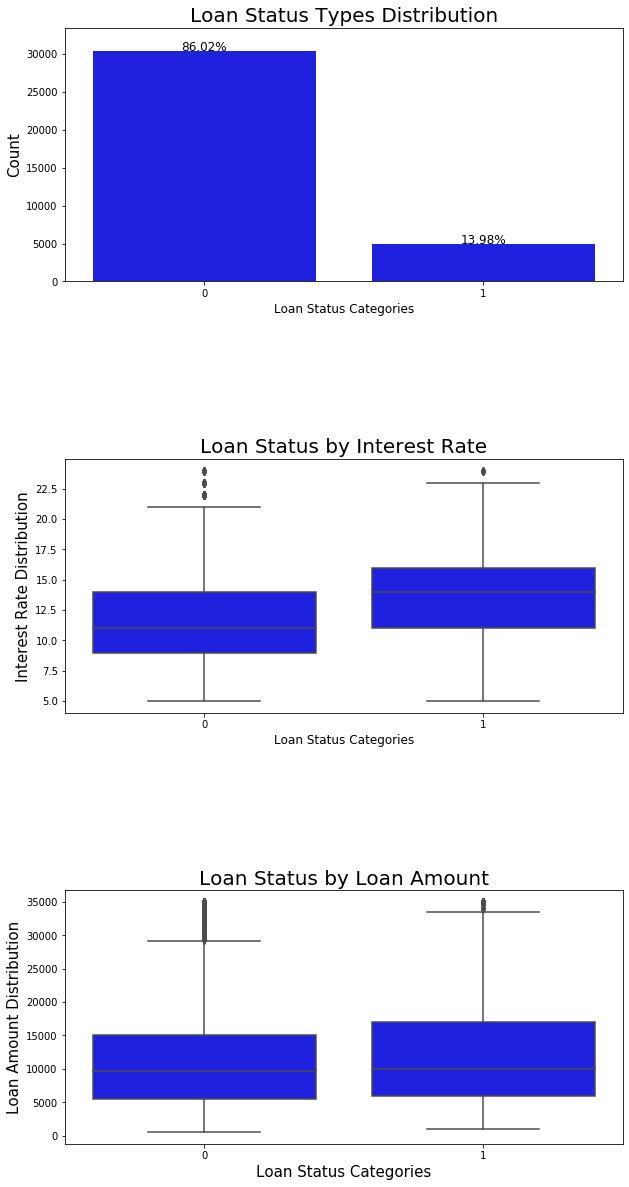

In [68]:
plt.figure(figsize = (10,20))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="int_round", data=loan, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels())
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=loan, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels())
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)
plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Observations from Loan Status :
    1- There are 3 different categories of loan-status : Fully paid, Current, Charged Off
    
    2- Most of the loans are in "Fully Paid" category as we can see 83.15%  from the frequency distribution plot.
    
    3- The "Charged Off" or Defaulters category has around 5000 frequency. That means there are 5000 consumers in 
      the defaulter category.
        
    4- Basically the "Charged Off"/Defaulters have taken a loan amount in the range of >5000 & <20000 range.
    
    5- We also notice that the interest rate charged on the Defaulters ranges between >10% and <17.5%.

## ANALYSIS OF LOAN  STATUS WITH DIFFERENT VARIABLES:

In [69]:
def loan_status_text(x):
    x = loan['loan_status'].apply(lambda x : 'Fully Paid' if x==0 else 'Charged Off')
    return x

(0, 33466.4)

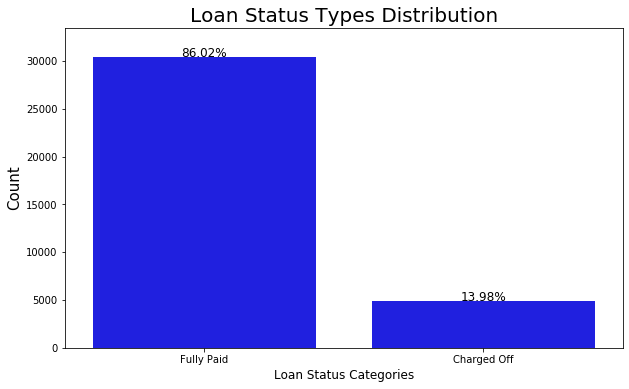

In [70]:
#Frequency Distribution of Loan Status

plt.figure(figsize = (10,20))

loan_stat_num = [0,1]
loan_status_text = ['Fully Paid','Charged Off']

plt.subplot(311)
g = sns.countplot(x="loan_status", data=loan, 
                  color='blue')
g.set_xticks(loan_stat_num)
g.set_xticklabels(loan_status_text)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

Observation : We see that the overall default rate is 13.98 % & Fully Paid rate is 86.02%

We will see the relationship of loan_status w.r.t various categorical variables:

1- Grade

2- Purpose

3- Sub - Grades

4- Term

5- Employee Length


### Loan Status Analysis Based on Purpose 

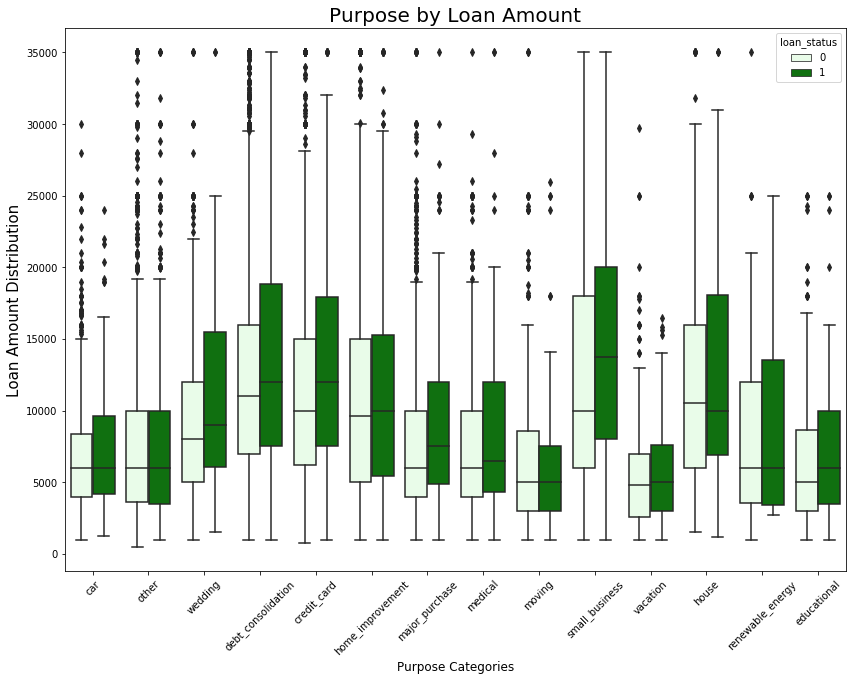

In [71]:
plt.figure(figsize=(14,10))
g1 = sns.boxplot(x="purpose", y="loan_amnt", hue='loan_status', data=loan, 
                 color='green')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Purpose Categories", fontsize=12)
g1.set_ylabel("Loan Amount Distribution", fontsize=15)
g1.set_title("Purpose by Loan Amount", fontsize=20)
plt.show()

Observation: Here we see 'debt_consolidation' is most common purpose for which a client requests a loan

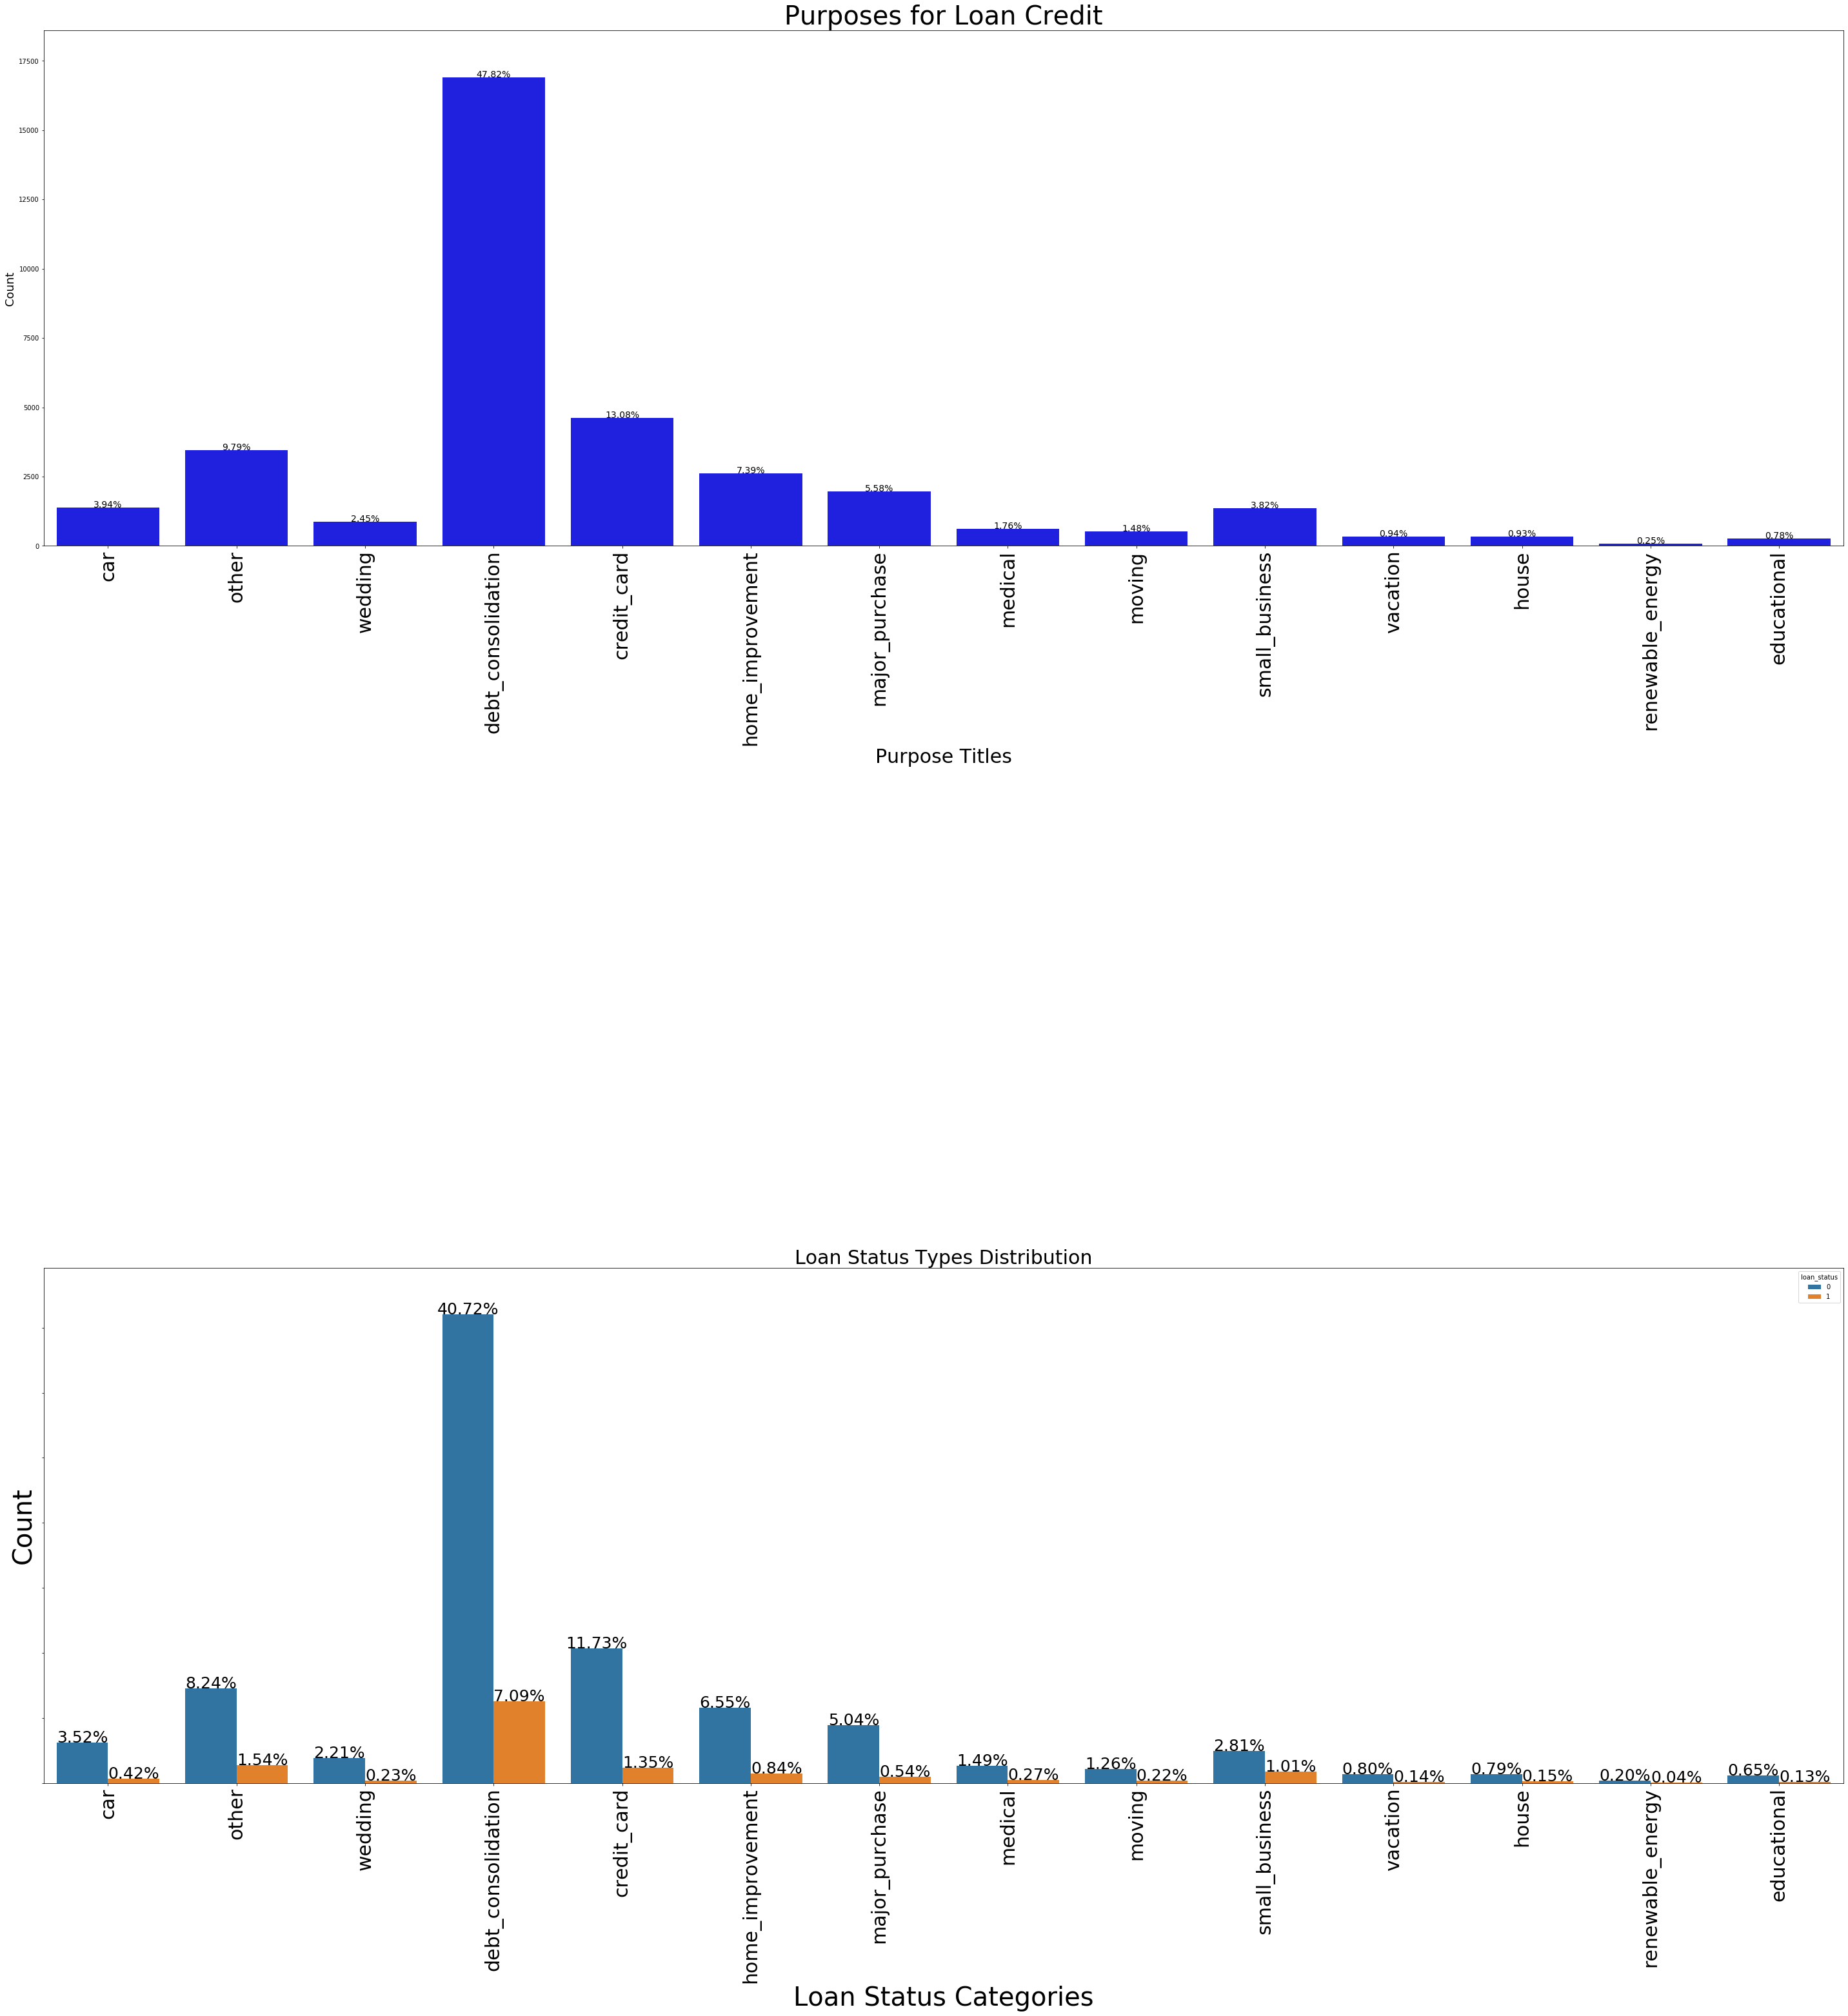

In [72]:
#ANALYSIS BASED ON PURPOSE

# plt.figure(figsize=(14,6))
plt.figure(figsize=(50,50))
plt.subplot(311)
g = sns.countplot(x='purpose', data=loan, 
                  color='blue')
g.set_title("Purposes for Loan Credit", fontsize=40)
g.set_xlabel("Purpose Titles", fontsize=30)
g.set_ylabel('Count', fontsize=18)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=90,fontsize=30)

# plt.figure(figsize=(25,10))
plt.subplot(313)
g1 = sns.countplot( x="purpose", hue='loan_status', data=loan)
plt.xlabel('Purpose',fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90, fontsize=30)
g1.set_yticklabels(g1.get_yticklabels(), fontsize=10)
g1.set_xlabel("Loan Status Categories", fontsize=40)
g1.set_ylabel("Count", fontsize=40)
g1.set_title("Loan Status Types Distribution", fontsize=30)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=25) 
g1.set_ylim(0, max(sizes) * 1.10)

plt.show()

Observation: debt_consolidation is most common purpose of loan

Observation : There are 5 major contributers of DEFAULTERS. 
1- debt_consolidation - 7.09%

2- other - 1.54%

3- credit_card - 1.35%

4- small_business- 1.01%

5- home_improvement - 0.84%


Observation : There are 5 major contributers of FULLY PAID category is. 
1- debt_consolidation - 40.72%

2- credit_card - 11.73%

3- other - 8.24%

4- home_improvement - 6.55%

5- major_purpose - 5.4%

### Loan Status Analysis Based on Term 

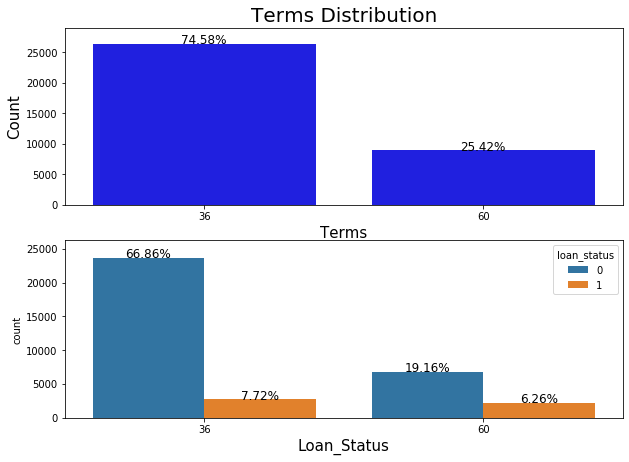

In [73]:
#Term Distribution Analysis

plt.figure(figsize = (10,15))

plt.subplot(411)
# plt.figure(figsize = (20,20))
g = sns.countplot(x="term", data=loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Terms", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Terms Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(412)
# plt.figure(figsize = (20,10))
g1 = sns.countplot( x="term", hue='loan_status', data=loan)
plt.xlabel('Loan_Status',fontsize=15)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observation :

    1-  Most loan applicants have taken loan for a term period of 36 months.
    2-  Here we can see that for a 36 months term period, the default rate is 7.72%, but for 60 months term period it is 6.26%.


### Loan Status Analysis Based on Grade 

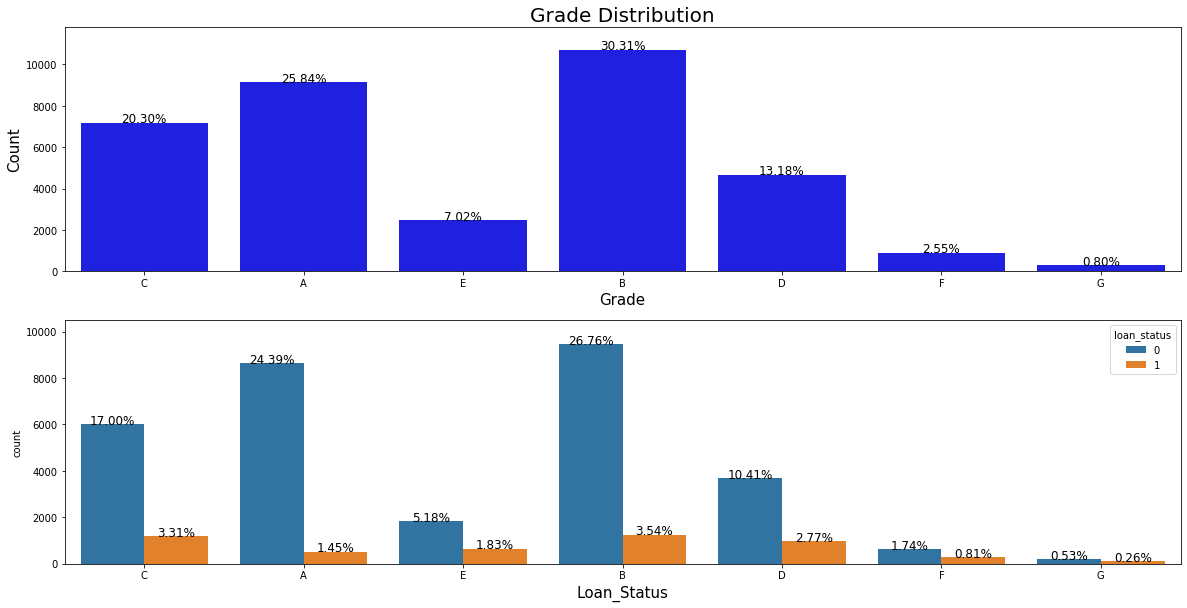

In [74]:
#Grade Distribution Analysis

plt.figure(figsize = (20,26))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x="grade", data=loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Grade", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Grade Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot( x="grade", hue='loan_status', data=loan)
plt.xlabel('Loan_Status',fontsize=15)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observations:

    1- We see the the loans against GRADE B is the highest.
    2- Grade A & Grade C are other 2 most common grades of loan.
    3- Grade B has a Default rate of 3.54%.
    4- So we can say that, Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.

### Loan Status Analysis Based on Sub-Grade 

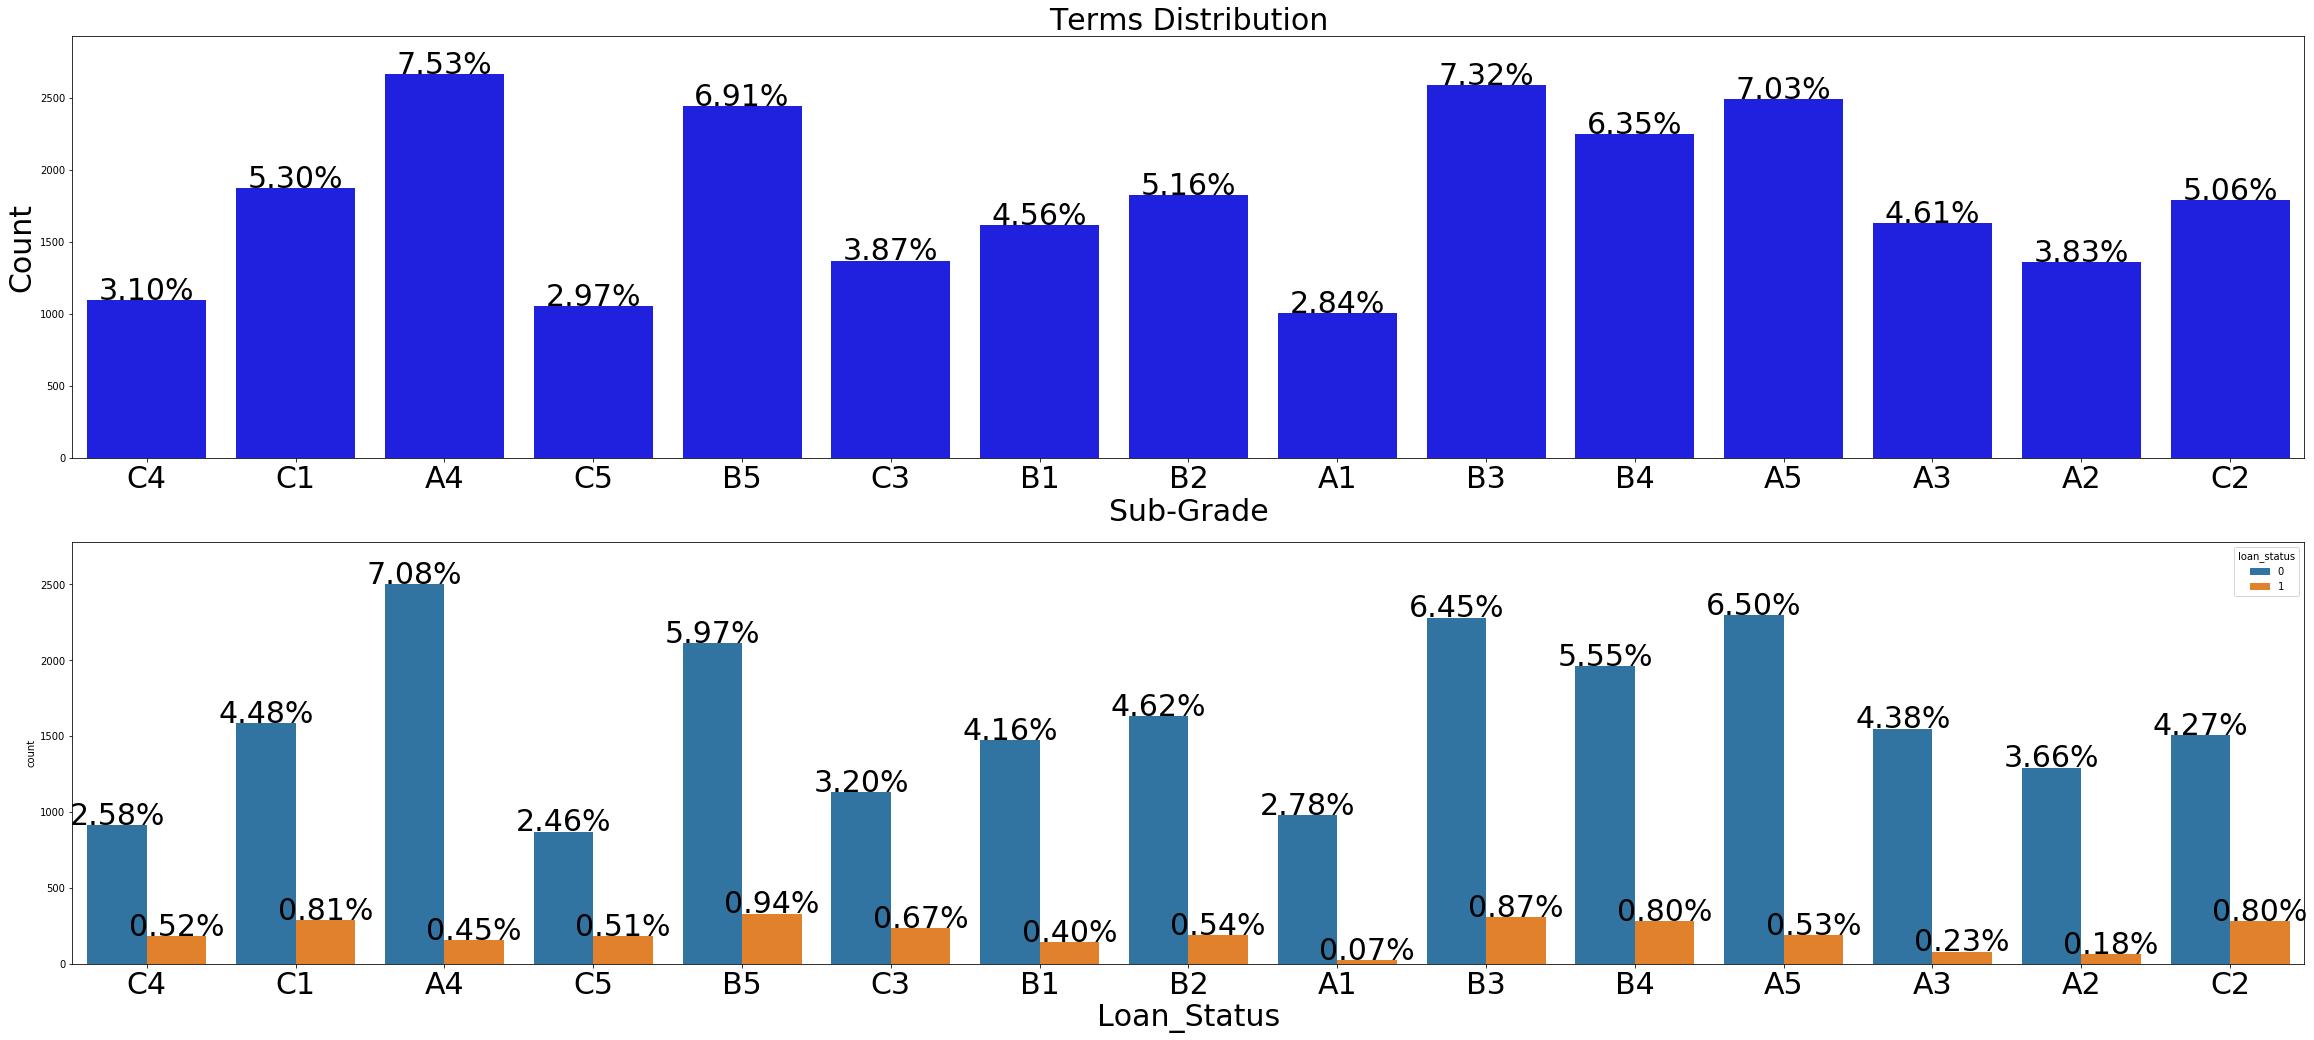

In [75]:
#Sub-Grade Distribution Analysis

subgrade_data = ['A1','A2','A3','A4','A5',
                 'B1','B2','B3','B4','B5',
                 'C1','C2','C3','C4','C5']

df = loan[loan['sub_grade'].isin(subgrade_data)]

plt.figure(figsize = (40,45))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='sub_grade', data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(), fontsize=30)
g.set_xlabel("Sub-Grade", fontsize=30)
g.set_ylabel("Count", fontsize=30)
g.set_title("Terms Distribution", fontsize=30)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=30) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot( x="sub_grade", hue='loan_status', data=df)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=30)
plt.xlabel('Loan_Status',fontsize=30)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=30) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observation:
    
    1- Here B3 is highest sub-grade from Grade B in the total number of applications.    
    2- We can also see A4 sub-grade is the highest with 7.53% of the total loan applicants.   
    3- On checking the default rate, we see the highest defaulters are present in the B5 sub-grade which is 0.95%.

### Loan Status Analysis Based on Employee Length

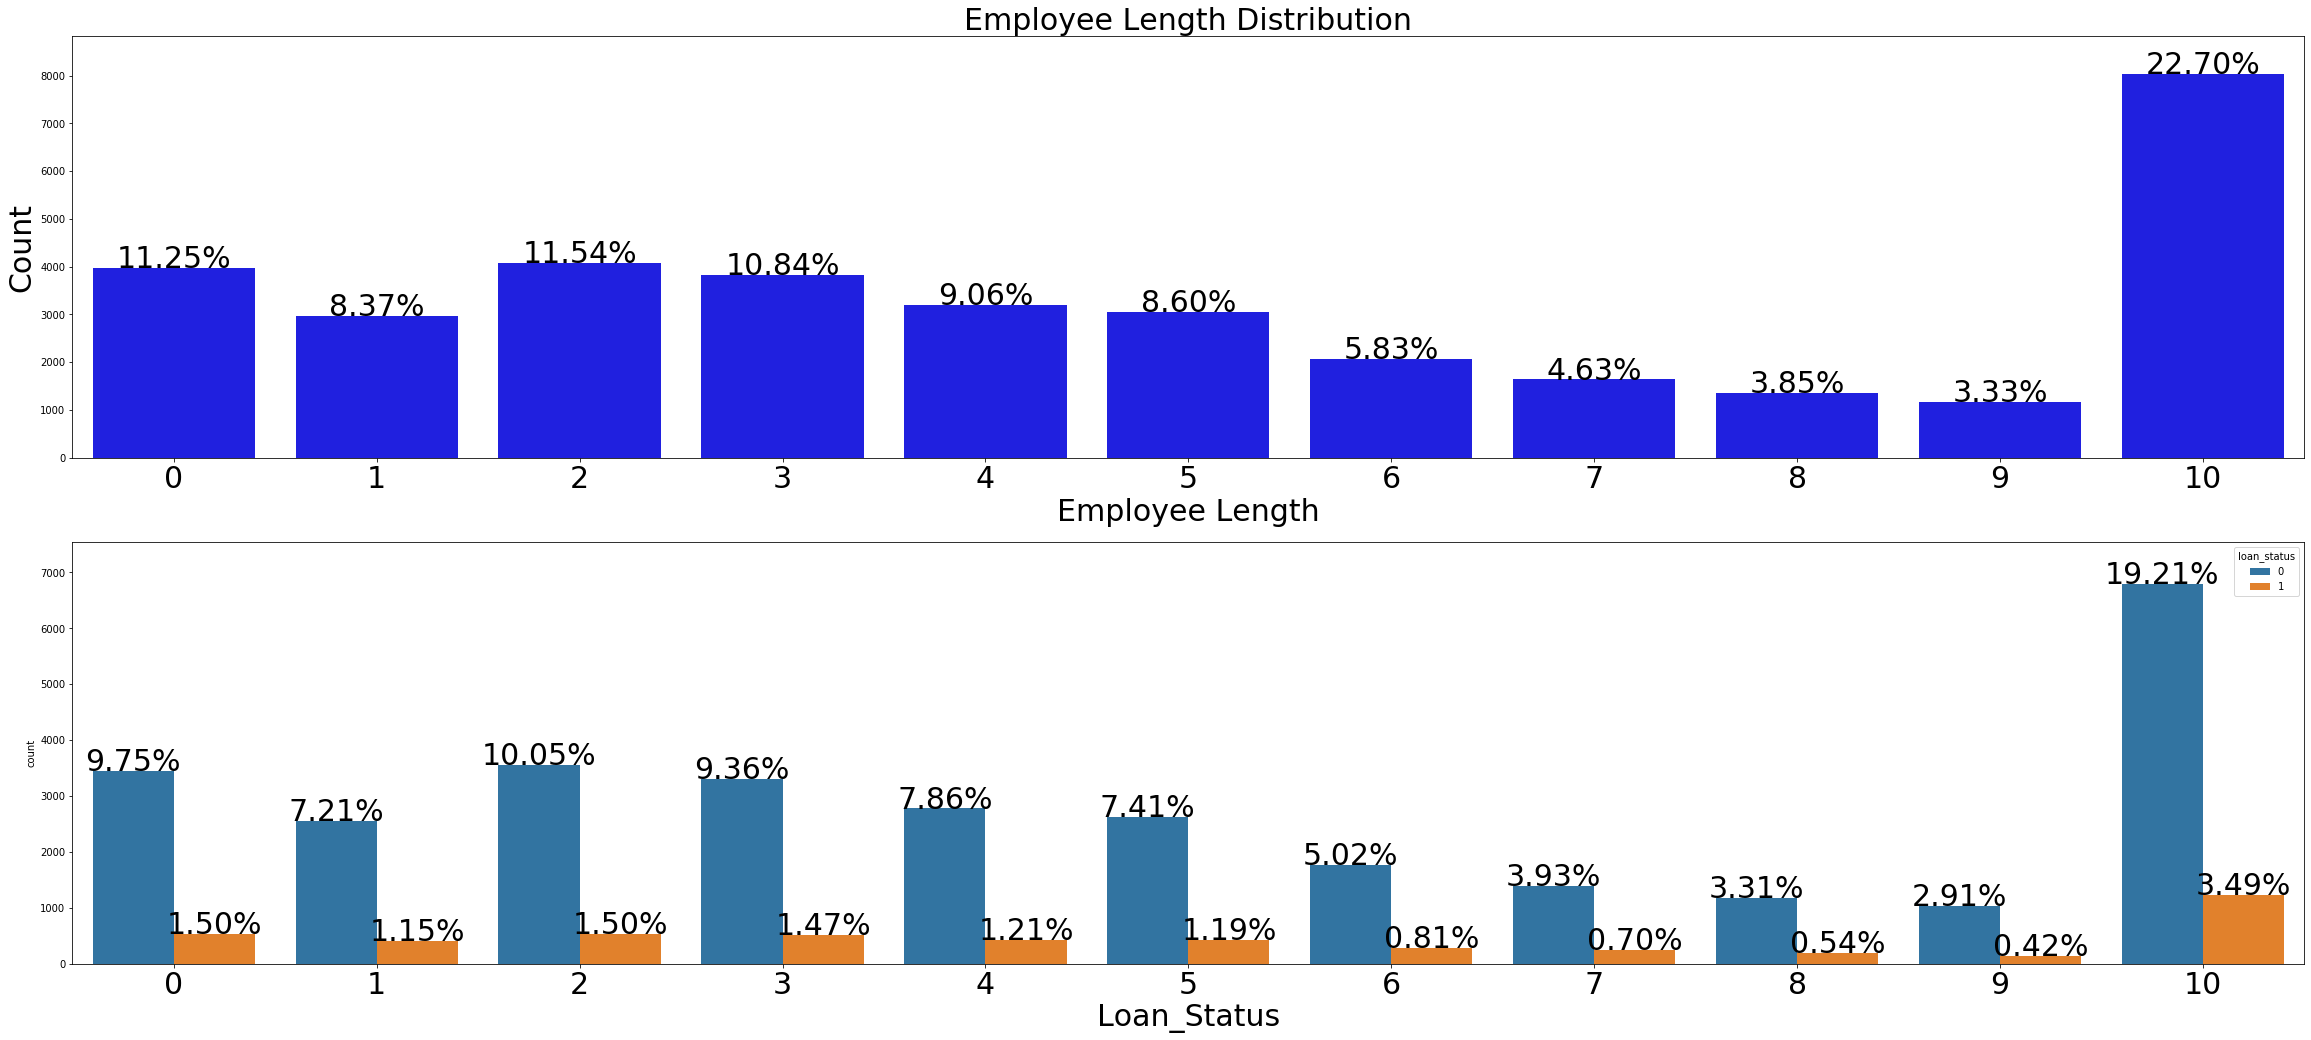

In [76]:
#Employee Lenght Distribution Analysis

plt.figure(figsize = (40,45))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='emp_length', data=loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(), fontsize=30)
g.set_xlabel("Employee Length", fontsize=30)
g.set_ylabel("Count", fontsize=30)
g.set_title("Employee Length Distribution", fontsize=30)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=30) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot( x="emp_length", hue='loan_status', data=loan)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=30)
plt.xlabel('Loan_Status',fontsize=30)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=30) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observation:

    1- Most of the loan applicants employment length is more than or equal to 10 years.
    2- Defaulters rate of loan applicants is 3.49%.

### Loan Status Analysis Based on Verification Status

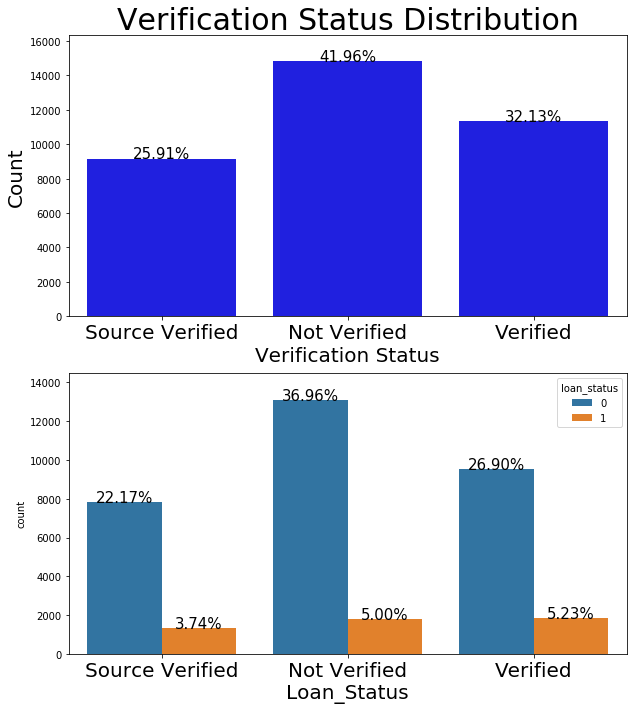

In [77]:
#Verification Status Distribution Analysis

plt.figure(figsize = (10,30))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='verification_status', data=loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(), fontsize=20)
g.set_xlabel("Verification Status", fontsize=20)
g.set_ylabel("Count", fontsize=20)
g.set_title("Verification Status Distribution", fontsize=30)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot( x="verification_status", hue='loan_status', data=loan)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=20)
plt.xlabel('Loan_Status',fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observation: The Default Rate of various categories is as below:

1- Source Verified : 3.74%

2- Not Verified : 5%

3- Verified : 5.23%

The highest defaulters lie in the "Not Verified" category.

### Loan Status Analysis Based on Home Ownership

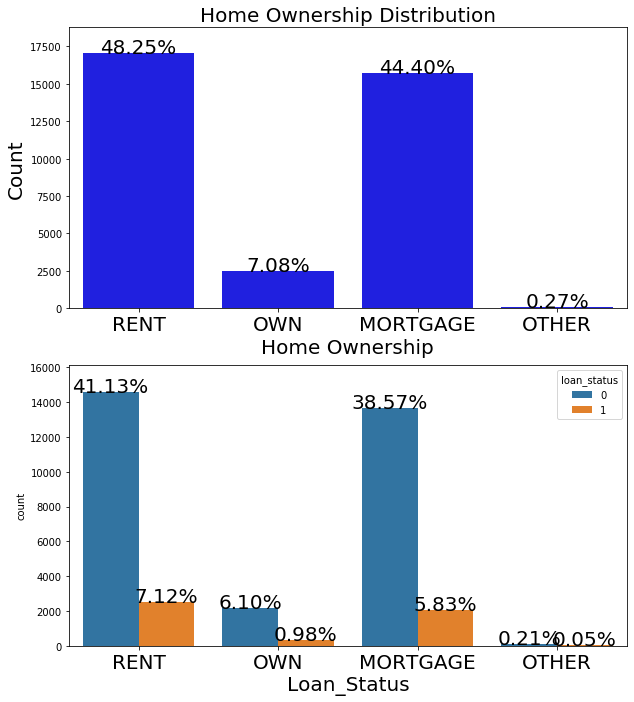

In [78]:
#home_ownership Distribution Analysis
plt.figure(figsize = (10,30))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='home_ownership', data=loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(), fontsize=20)
g.set_xlabel("Home Ownership", fontsize=20)
g.set_ylabel("Count", fontsize=20)
g.set_title("Home Ownership Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=20) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot( x="home_ownership", hue='loan_status', data=loan)
g1.set_xticklabels(g1.get_xticklabels(), fontsize=20)
plt.xlabel('Loan_Status',fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=20) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observation :

1- Most of the loan applicants are under the RENT category in home ownership.
2- The highest defaulters are also from the RENT category which is of 7.12% of the total defaulters.

**Analysis of Distribution of Loan Amount, Funded Amopunt & Funded Amount Invested**

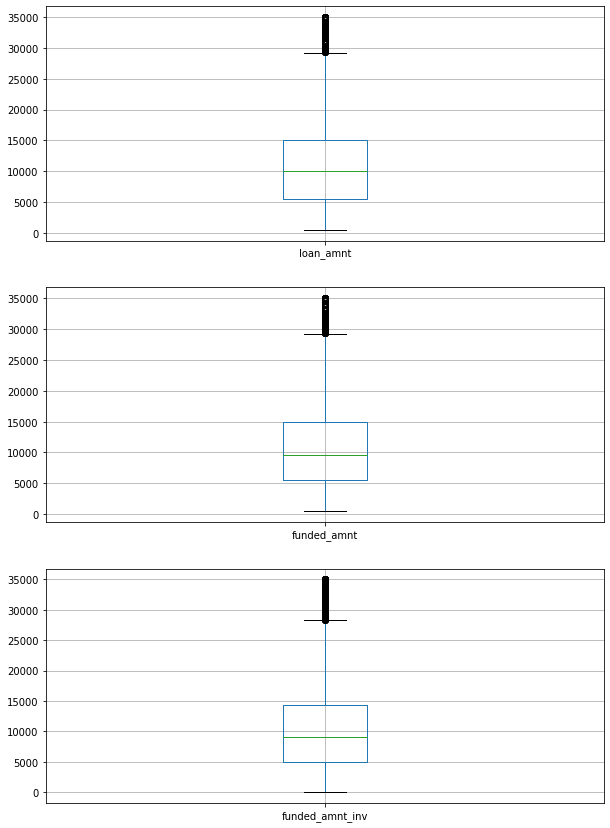

In [79]:
#Box Plot Distributions of Loan Amount, Funded Amopunt & Funded Amount Invested

plt.figure(figsize=(10,25))

plt.subplot(511)
q1 = loan.boxplot(column='loan_amnt')

plt.subplot(512)
q2 = loan.boxplot(column='funded_amnt')

plt.subplot(513)
q3 = loan.boxplot(column='funded_amnt_inv')

plt.show()

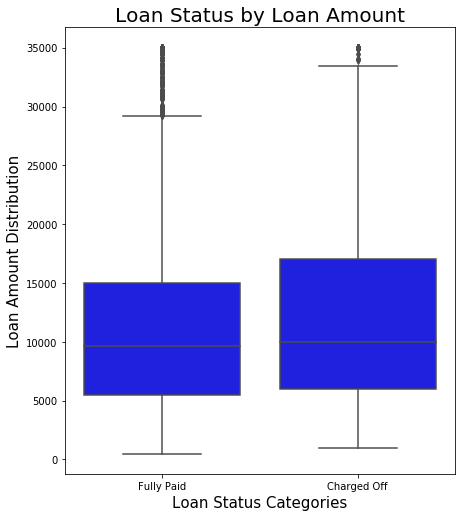

In [80]:
plt.figure(figsize=(7,8))
loan_stat_num = [0,1]
loan_status_text = ['Fully Paid','Charged Off']
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=loan, 
                 color='blue')
g2.set_xticks(loan_stat_num)
g2.set_xticklabels(loan_status_text)
g2.set_xticklabels(g2.get_xticklabels())
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

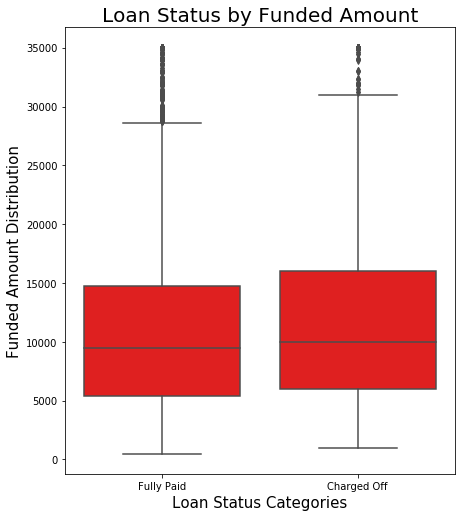

In [81]:
plt.figure(figsize=(7,8))
loan_stat_num = [0,1]
loan_status_text = ['Fully Paid','Charged Off']

g2 = sns.boxplot(x="loan_status", y="funded_amnt", data=loan, 
                 color='red')
g2.set_xticks(loan_stat_num)
g2.set_xticklabels(loan_status_text)
g2.set_xticklabels(g2.get_xticklabels())
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Funded Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Funded Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

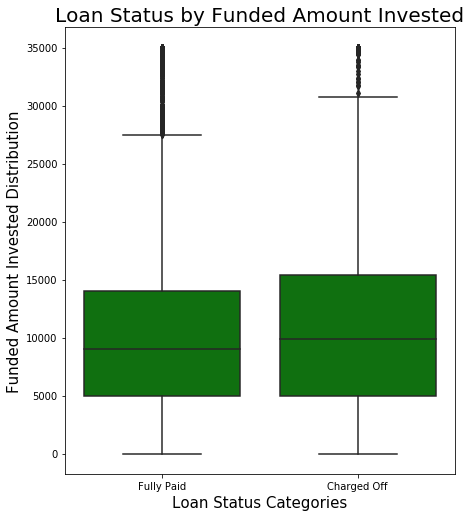

In [82]:
plt.figure(figsize=(7,8))
loan_stat_num = [0,1]
loan_status_text = ['Fully Paid','Charged Off']
g2 = sns.boxplot(x="loan_status", y="funded_amnt_inv", data=loan, 
                 color='green')
g2.set_xticks(loan_stat_num)
g2.set_xticklabels(loan_status_text)
g2.set_xticklabels(g2.get_xticklabels())
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Funded Amount Invested Distribution", fontsize=15)
g2.set_title("Loan Status by Funded Amount Invested", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

Observation : 

    1- Most of the loan amount is issued for Fully Paid borrowers is in the range of >$5000 and < $15000.
    2- The defaulters loan amount ranges between  >$5000 & <= $15000.
    3- The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

**Analysis of Funded AMount Invested over Issued Month and Year**

#### plt.figure(figsize=(10,8))
sns.barplot('issue_d_year', 'funded_amnt_inv', data=loan, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Issued Year', fontsize=14)
plt.ylabel('Average funded amount issued by the investor', fontsize=14)

plt.figure(figsize=(10,8))
sns.barplot('issue_d_month', 'funded_amnt_inv', data=loan, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Issue Month', fontsize=14)
plt.ylabel('Average funded amount issued by the investor', fontsize=14)

plt.show()

Observation: 

1- Most of the loan amount was issued in the year 2011. 

2- Also we can most of the loans were issued in the month of December.


## Analysis for Continous Variables:

1- Annual Income

2- Interest Rate

3- DTI

**Analysis of Annual Income** 

In [83]:
loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

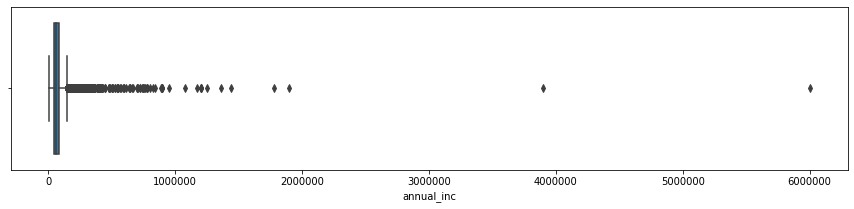

In [84]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan['annual_inc'], data=loan)

Observation:

1- The income lies in the range of 4000 to 6000,000 range.

2- Most of the people have annual income less than 1150000.

3- Also we can some outliers are present which shows max annual income as 60000000. So we need to remove the outliers.


In [85]:
data_annual_inc = loan[np.abs(loan.annual_inc-loan.annual_inc.mean()) <= (3*loan.annual_inc.std())]

In [86]:
data_annual_inc.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

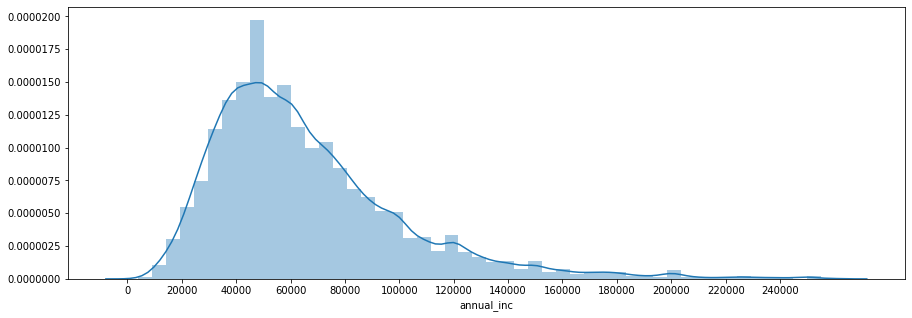

In [87]:
plt.figure(figsize=(15, 5))
sns.distplot(data_annual_inc['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

Bin is taken as 20000.

In [88]:
loan['income_bin'] = loan['annual_inc']/20000
loan['income_bin'] = loan['income_bin'].astype(int)

In [89]:
data1 = loan.loc[loan['income_bin']<21]
print(data1.shape)
data1.head()

(35295, 46)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,int_round,income_bin
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,1,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011,15,1
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,0,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011,13,2
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011,8,1
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,0,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011,16,2
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,2011-12-01,0,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011,19,2


posx and posy should be finite values
posx and posy should be finite values


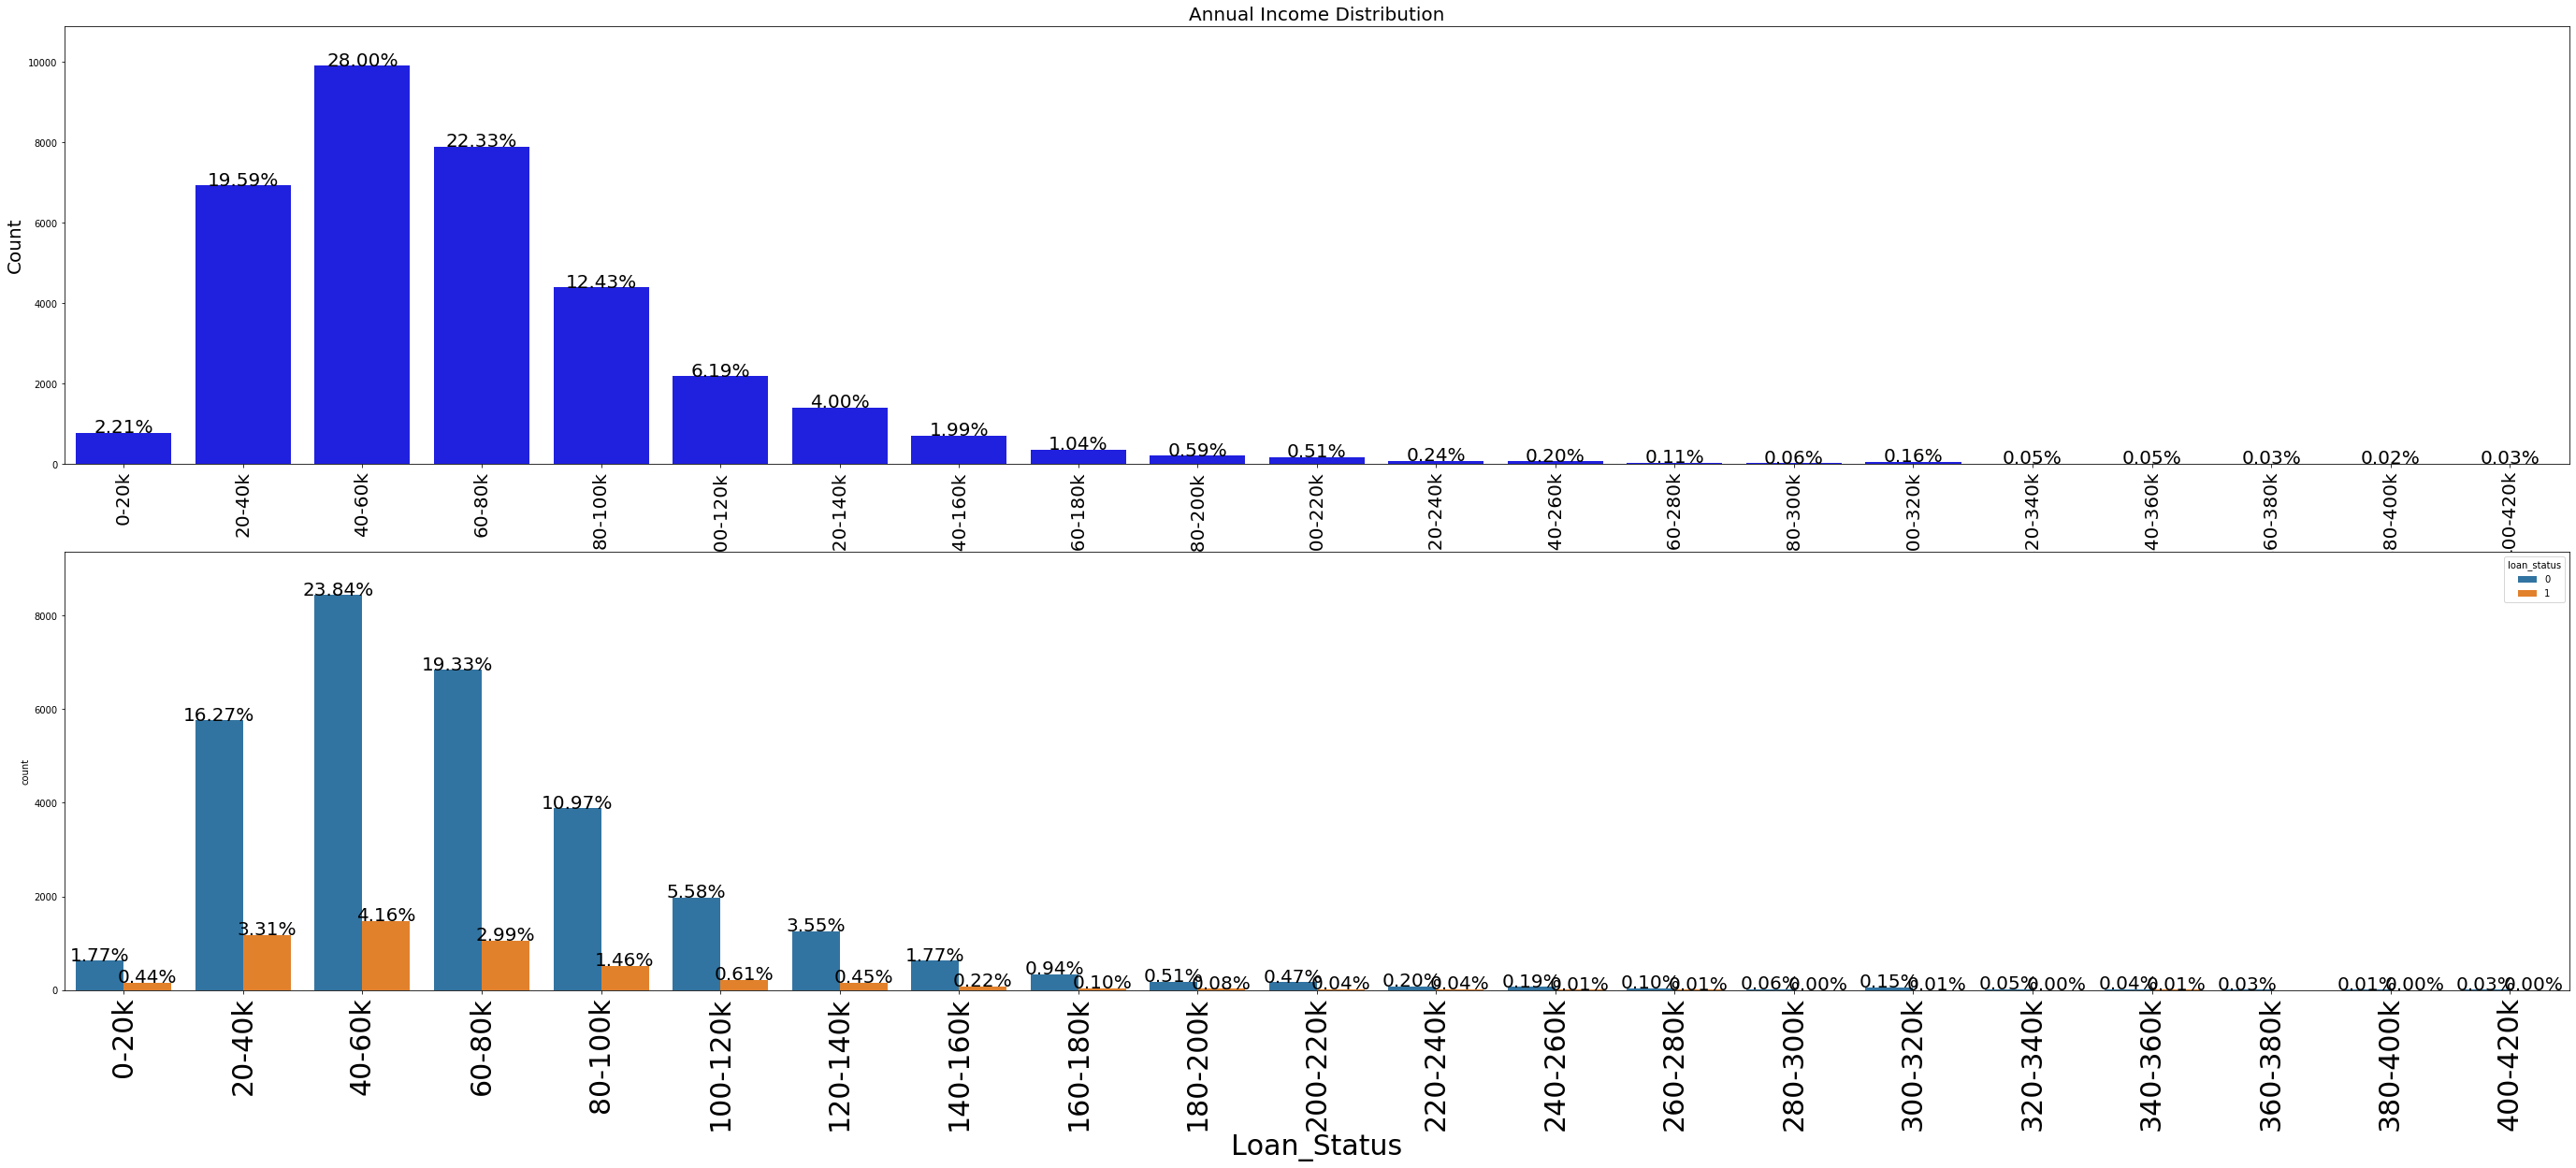

In [90]:
#Income Distribution Analysis

plt.figure(figsize = (48,50))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='income_bin', data=data1, 
                  color='blue')
# g.set_xticklabels(g.get_xticklabels(), fontsize=20)

g.set_xticklabels([(str(int(x.get_text())*20)+'-'+str(int(x.get_text())*20+20)+'k') for x in g.get_xticklabels()],
                  fontsize=20, rotation = 90)

g.set_xlabel("Annual Income", fontsize=20)
g.set_ylabel("Count", fontsize=20)
g.set_title("Annual Income Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=20) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot(x="income_bin", hue='loan_status', data=data1)
g1.set_xticklabels([(str(int(x.get_text())*20)+'-'+str(int(x.get_text())*20+20)+'k') for x in g1.get_xticklabels()],
                  fontsize=30, rotation = 90)
plt.xlabel('Loan_Status',fontsize=30)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=20) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observations:

1- Most of the loan applicants have income between the range of $40-$60k.

2- The highest Default rate is for the income range between 40-60k USD which is around 4.19%.

**Analysis of Interest Rate** 

In [91]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'int_round',
       'income_bin'],
      dtype='object')

In [92]:
loan.int_rate.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9,0.95,0.98])

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
10%          7.140000
25%          8.940000
50%         11.830000
75%         14.460000
90%         16.820000
95%         18.390000
98%         20.110000
max         24.400000
Name: int_rate, dtype: float64

In [93]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11
1,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40


In [94]:
loan['int_bin'] = loan['int_rate']/5
loan['int_bin'] = loan['int_bin'].astype(int)

In [95]:
loan.int_bin.value_counts()

2    17003
1    10867
3     6769
4      728
Name: int_bin, dtype: int64

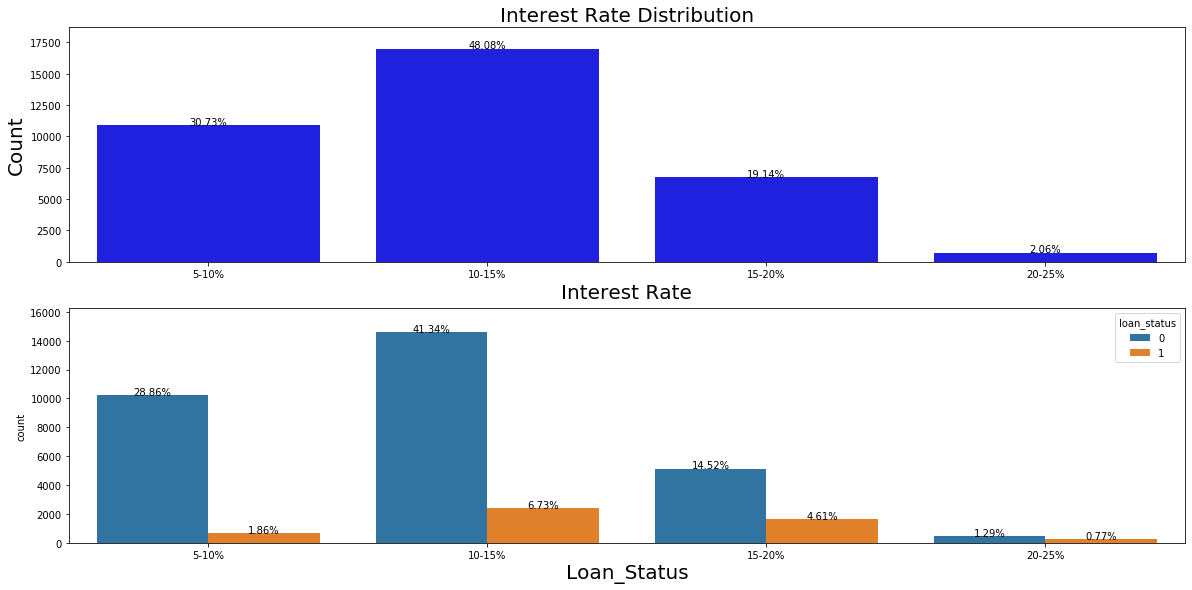

In [96]:
#Interest Rate Distribution Analysis

plt.figure(figsize = (20,25))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='int_bin', data=loan, 
                  color='blue')
# g.set_xticklabels(g.get_xticklabels(), fontsize=20)

g.set_xticklabels([(str(int(x.get_text())*5)+'-'+str(int(x.get_text())*5+5)+'%') for x in g.get_xticklabels()],
                  fontsize=10)

g.set_xlabel("Interest Rate", fontsize=20)
g.set_ylabel("Count", fontsize=20)
g.set_title("Interest Rate Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(512)
# plt.figure(figsize = (20,10))
g1 = sns.countplot(x="int_bin", hue='loan_status', data=loan)
g1.set_xticklabels([(str(int(x.get_text())*5)+'-'+str(int(x.get_text())*5+5)+'%') for x in g1.get_xticklabels()],
                  fontsize=10)
plt.xlabel('Loan_Status',fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g1.set_ylim(0, max(sizes) * 1.11)
plt.show()

Observations:

1- The maximum Interest Rate for all applicants varies between 10-15%.

2- The Defaulters interest rate for 10-15% range is highest which is is 6.73%, followed by 15-20% interest range, where the default rate is 4.61%. 

**Analysis of DTI** 

In [97]:
loan.dti.isnull().sum()

0

In [98]:
loan.dti.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9,0.95,0.98,0.99])

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
10%          4.220000
25%          8.320000
50%         13.500000
75%         18.640000
90%         22.360000
95%         23.830000
98%         24.850000
99%         26.530000
max         29.990000
Name: dti, dtype: float64

In [99]:
loan['dti_bin'] = loan['dti']/5

# loan['dti_bin'] = pd.cut(loan['dti'], [1,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
loan['dti_bin'] = loan['dti_bin'].astype(int)

In [100]:
loan.dti_bin.value_counts()

2    8895
3    8182
1    7115
4    6181
0    4417
5     577
Name: dti_bin, dtype: int64

In [101]:
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,30424.0,13.280979,6.646843,0.0,8.160,13.345,18.53,29.99
1,4943.0,14.160908,6.522564,0.0,9.355,14.440,19.34,29.85


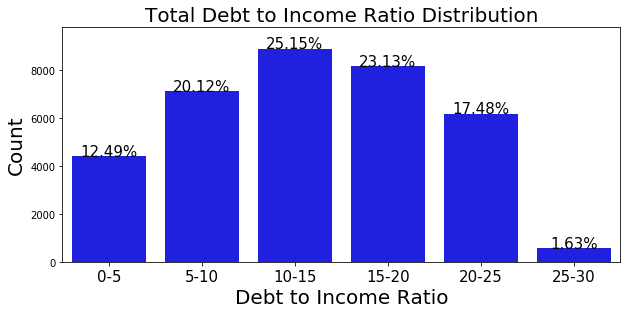

In [102]:
#DTI Distribution Analysis
plt.figure(figsize = (10,25))

plt.subplot(511)
# plt.figure(figsize = (20,20))
g = sns.countplot(x='dti_bin', data=loan, 
                  color='blue')
g.set_xticklabels([(str(int(x.get_text())*5)+'-'+str(int(x.get_text())*5+5)) for x in g.get_xticklabels()],
                  fontsize=15)

g.set_xlabel("Debt to Income Ratio", fontsize=20)
g.set_ylabel("Count", fontsize=20)
g.set_title("Total Debt to Income Ratio Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

In [103]:
def plotLoanStatus(dataframe, by, loanstatus=1):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ')
    ax.set_xticklabels([(str(int(x.get_text())*5)+'-'+str(int(x.get_text())*5+5)) for x in ax.get_xticklabels()],
                  fontsize=10)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

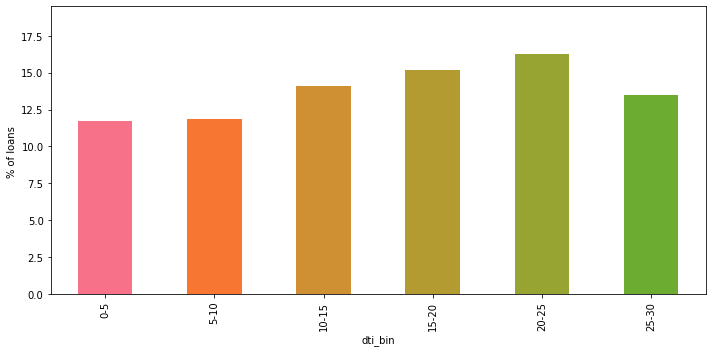

In [104]:
plt.figure(figsize=(10,5))
plotLoanStatus(loan, 'dti_bin')

Observations:

    1- We can see that when the dti or debt payment to income ratio is higher than 20, higher percentage of loans are Charged Off
    2- So that means ->Higher the dti --> higher the chances of loan being Charged Off

In [105]:
numeric_data = loan.select_dtypes(include = [np.number])

In [106]:
numeric_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,int_round,income_bin,int_bin,dti_bin
1,2500,2500,2500.0,60,15.27,59.83,0,30000.0,1,1.00,0,5,3,0,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,4,1999,12,2011,15,1,3,0
3,10000,10000,10000.0,36,13.49,339.31,10,49200.0,0,20.00,0,1,10,0,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,2,1996,12,2011,13,2,2,4
5,5000,5000,5000.0,36,7.90,156.46,3,36000.0,0,11.20,0,3,9,0,7963,28.3,12,0.0,0.0,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,11,2004,12,2011,8,1,1,2
6,7000,7000,7000.0,60,15.96,170.08,8,47004.0,0,23.51,0,1,7,0,17726,85.6,11,0.0,0.0,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.0,7,2005,12,2011,16,2,3,4
7,3000,3000,3000.0,36,18.64,109.43,9,48000.0,0,5.35,0,2,4,0,8221,87.5,4,0.0,0.0,3939.14,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,0.0,1,2007,12,2011,19,2,3,1


In [107]:
numeric_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'int_round',
       'income_bin', 'int_bin', 'dti_bin'],
      dtype='object')

In [108]:
numeric_data = numeric_data.drop(['out_prncp_inv','total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','int_round','income_bin', 'int_bin', 'dti_bin'], axis = 1)

In [109]:
numeric_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'issue_d_month',
       'issue_d_year'],
      dtype='object')

In [110]:
numeric_data = numeric_data.drop(['delinq_2yrs', 'inq_last_6mths'], axis = 1)

In [111]:
numeric_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'last_pymnt_amnt',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [112]:
numeric_data = numeric_data.drop(['annual_inc', 'loan_status'], axis = 1)

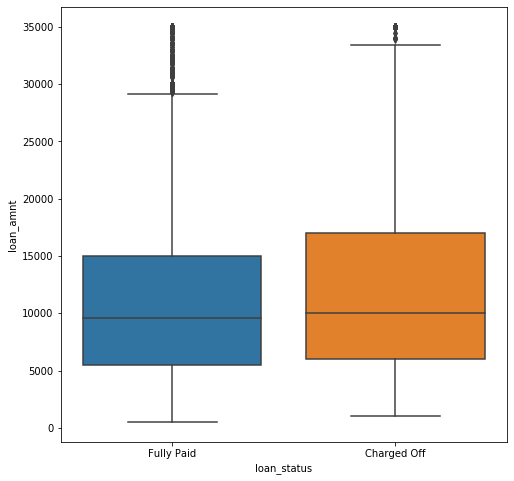

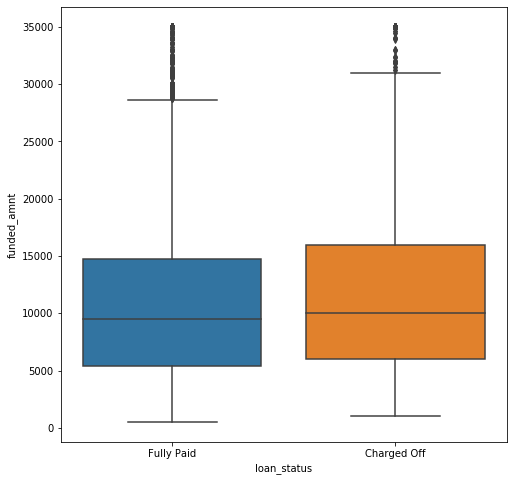

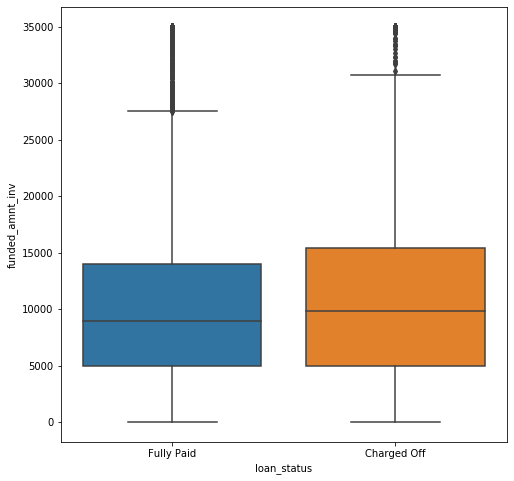

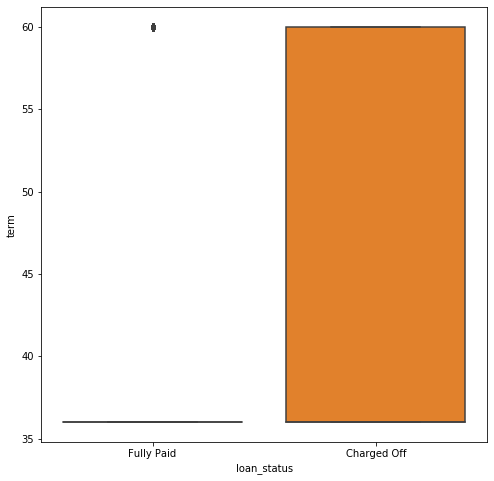

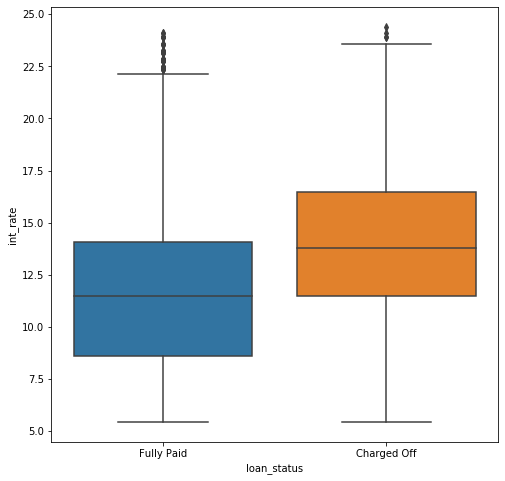

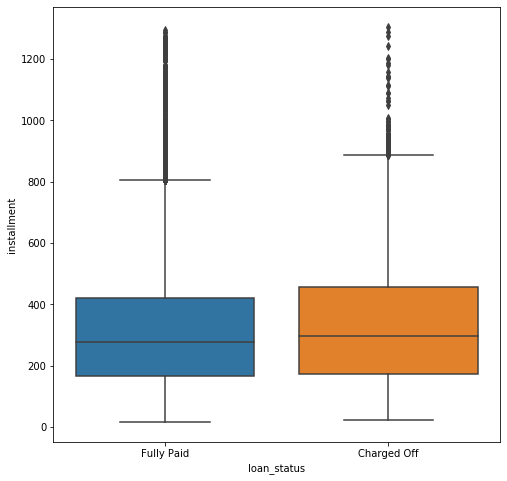

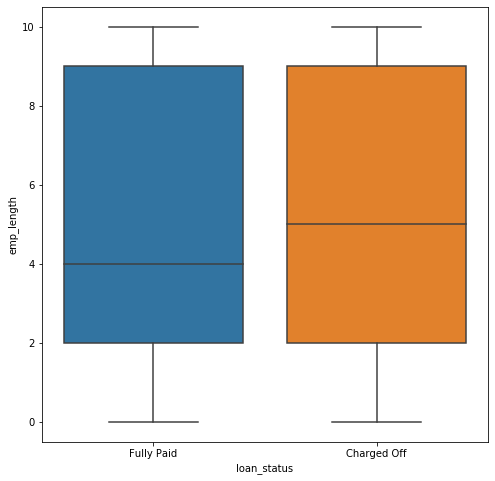

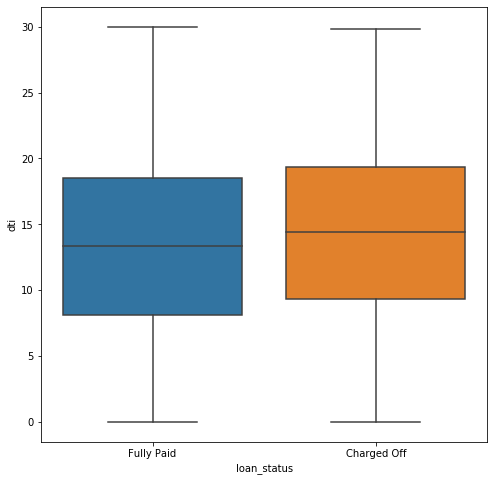

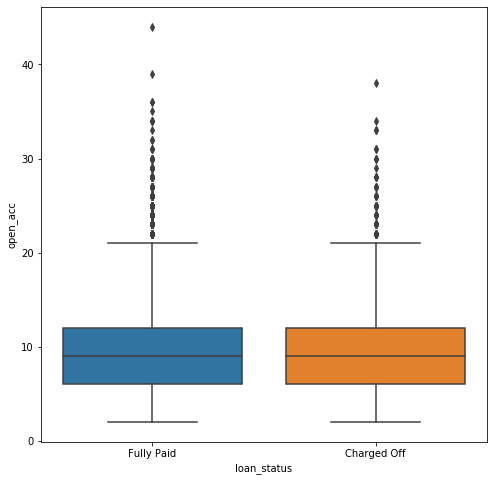

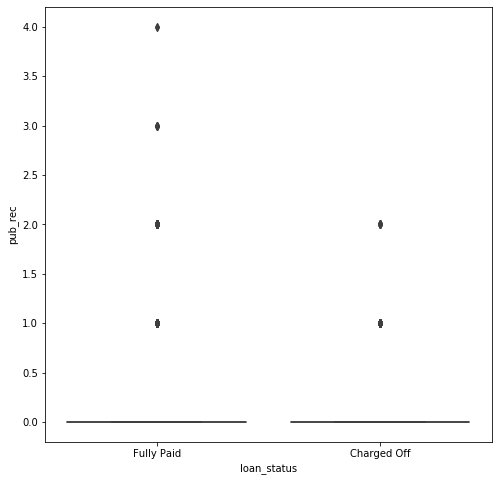

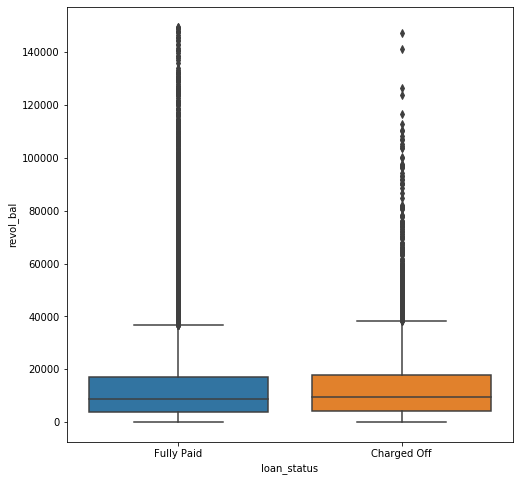

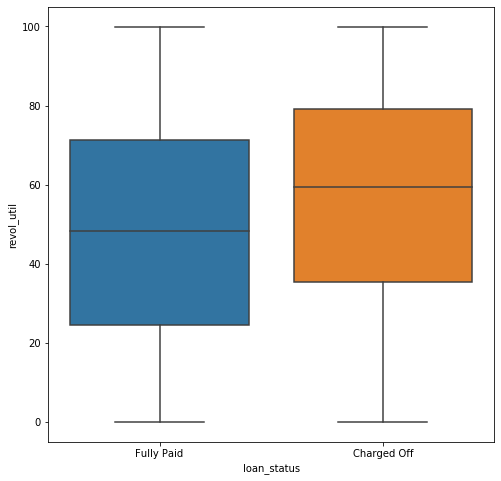

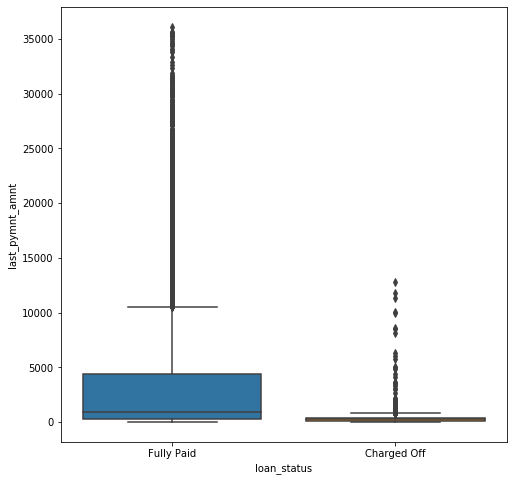

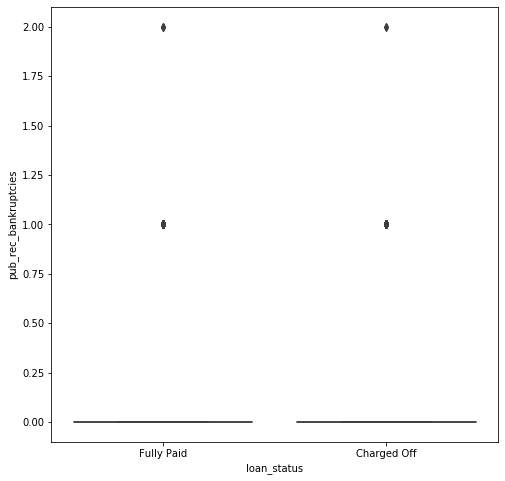

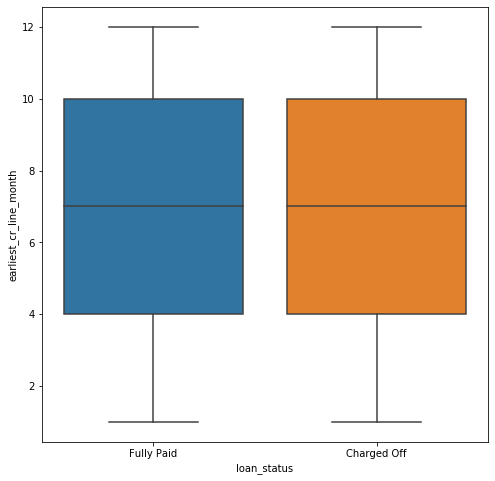

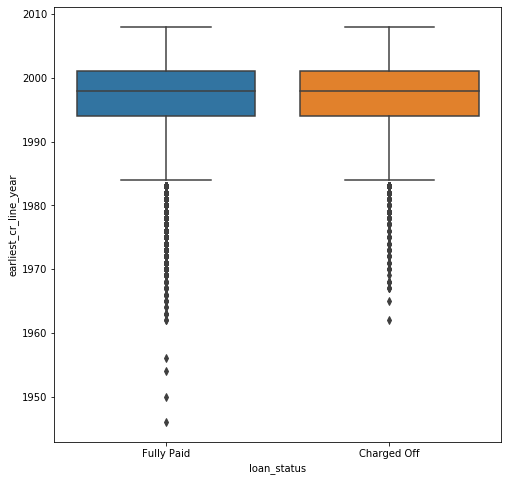

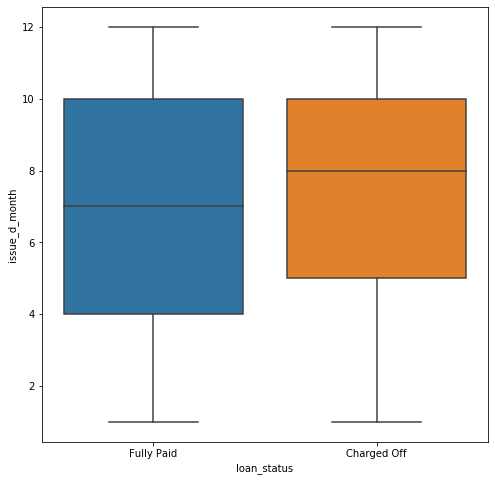

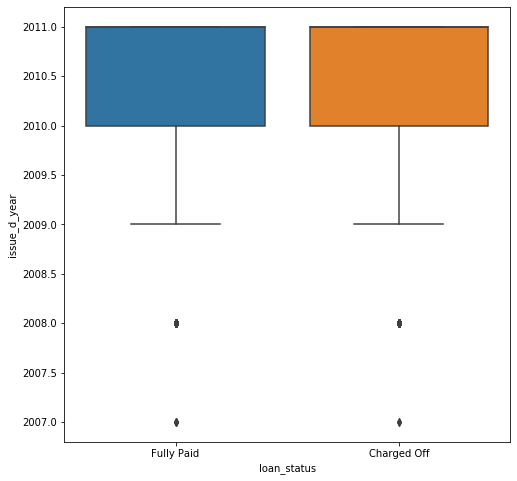

In [113]:
loan_stat_num = [0,1]
loan_status_text = ['Fully Paid','Charged Off']

for i in range(len(numeric_data.columns)):
    plt.figure(figsize=(8,8))
    g=sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=loan)
    g.set_xticks(loan_stat_num)
    g.set_xticklabels(loan_status_text)
    g.set_xticklabels(g2.get_xticklabels())
plt.show()

**Average Loan Amount vs Grade**

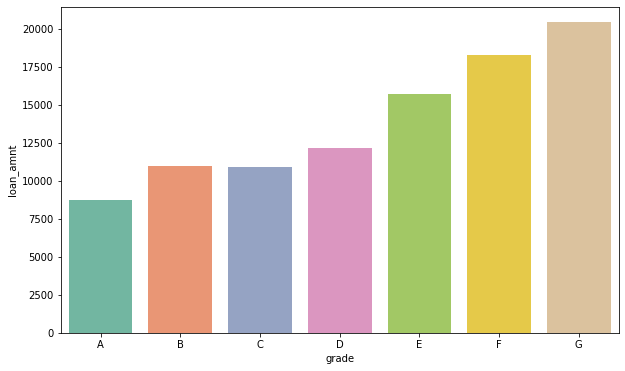

In [114]:
group = loan.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt',data=avg_loan, palette='Set2')

Observation: The lower the grade, higher the loan amount is issued

**Loan Amount vs Grade vs Loan Status**

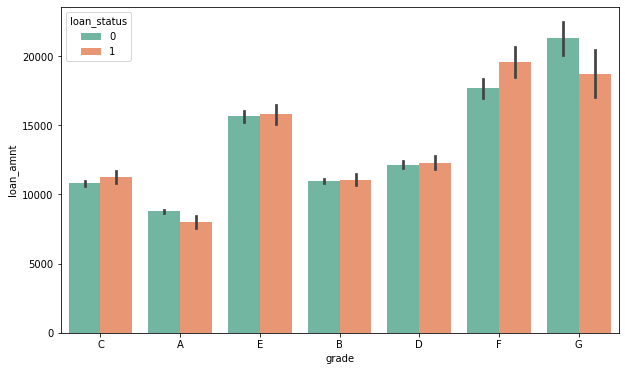

In [115]:
plt.subplots(figsize=(10,6))
sns.barplot(x='grade', y='loan_amnt',hue='loan_status',data=loan, palette='Set2')

Observation : We see the Defaulters loan amount is highest when the Grade is F.

**Interest Rate vs Grade**

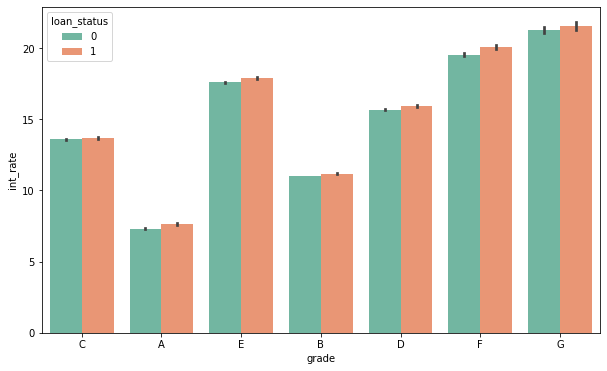

In [116]:
plt.subplots(figsize=(10,6))
sns.barplot(x='grade', y='int_rate',hue='loan_status',data=loan, palette='Set2')

Observation : We see the Defaulters Interest Rate is highest for Grade 'G'.

**Public Rec Bankruptcies vs Annual Income**

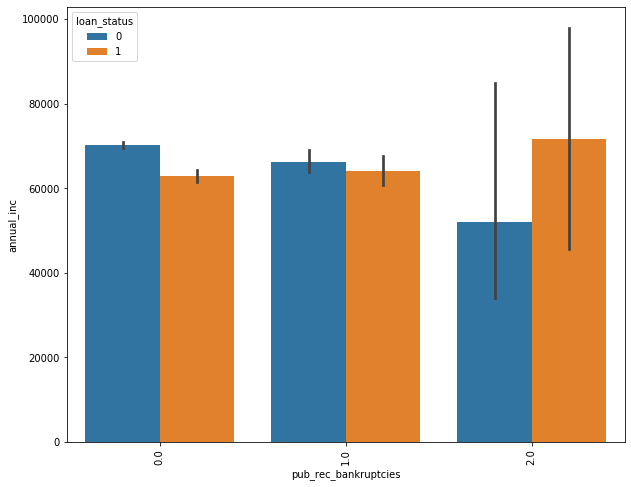

In [117]:
#Bar Plot Representation of Public Rec Bankruptcies vs Annual Income with hue as loan_status

plt.figure(figsize = (10,8))
sns.barplot(y='annual_inc', x ='pub_rec_bankruptcies',hue='loan_status',data=loan)
plt.xticks(rotation=90)
plt.show()

Observation : When Annual Income is higher, public bankruptcies is higher across the Defaulters

**Loan Amount vs Term**

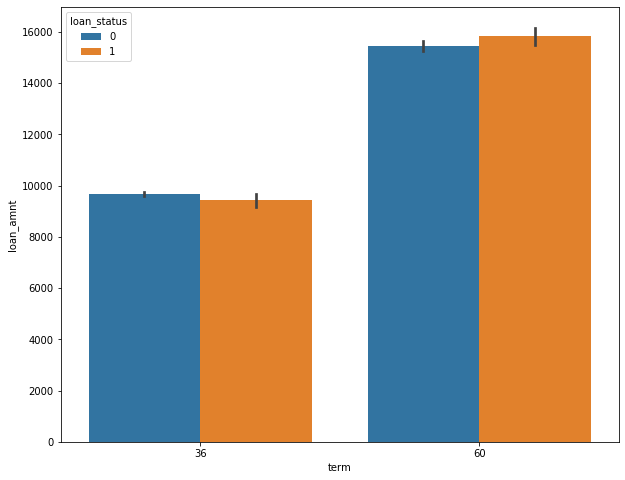

In [118]:
#Bar Plot Representation of Loan Amount vs Term with hue as loan_status

plt.figure(figsize = (10,8))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

Observation : Loan amount is higher for loan defaulters for 60 month term loan

**Interest Rate vs Term**

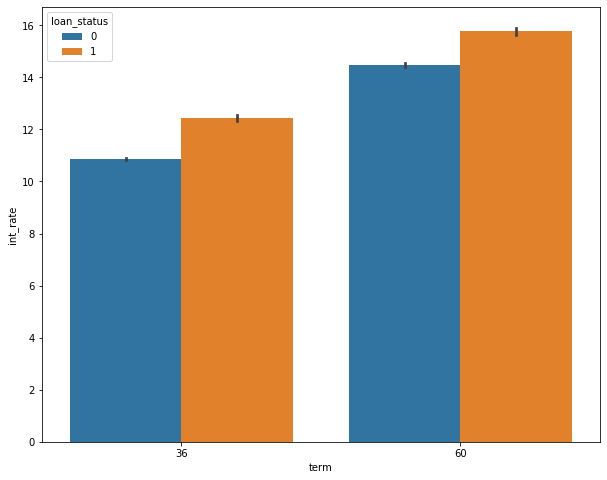

In [119]:
#Bar Plot Representation of Interest Rate vs Term with hue as loan_status

plt.figure(figsize = (10,8))
sns.barplot(x='term', y='int_rate', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

Observation : Interest Rate is higher for Loan Defaulters for 60 month term period

**Interest Rate vs Grade**

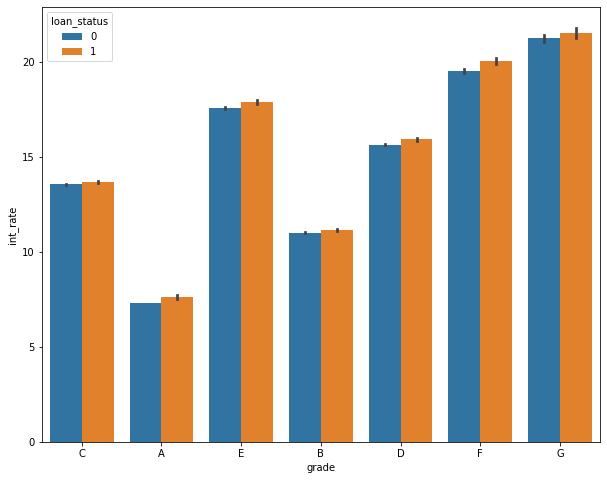

In [120]:
#Bar Plot Representation of Interest Rate vs Grade with hue as loan_status

plt.figure(figsize = (10,8))
sns.barplot(x='grade', y='int_rate', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

Observation : 

    1- The Defaulters are charged a high interest rate in Grade 'G'.
    2- We see a trend in the data where lower grades are having high interest rates charged.

**Interest Rate vs Sub-Grade**

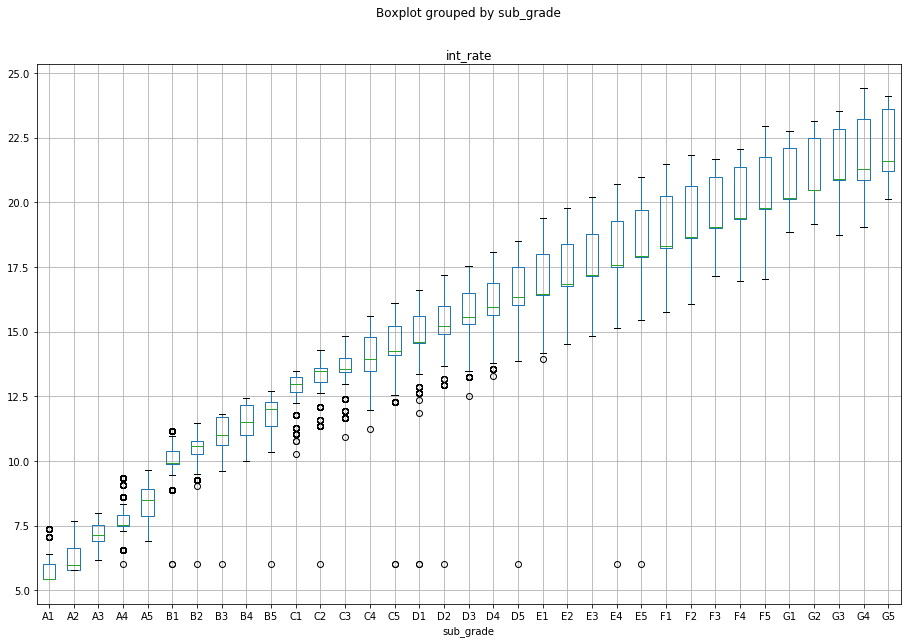

In [121]:
#Box Plot Representation of Interest Rate vs Sub-Grade

loan.boxplot(column='int_rate', by='sub_grade',figsize=(15,10))
plt.show()

Observation : 

    1-The percentage of interest rates increase as we go down the lower sub-grades.

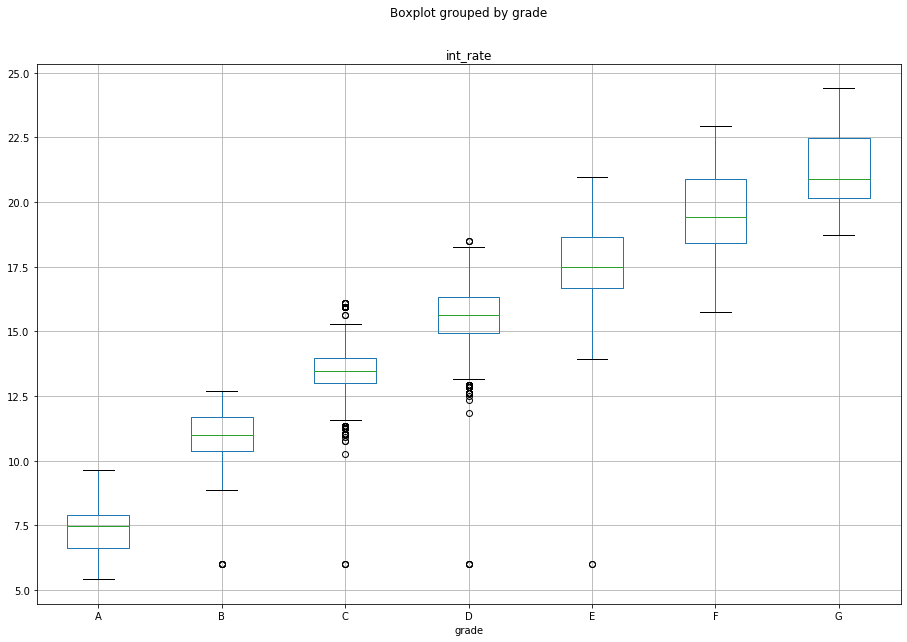

In [122]:
#Box Plot Representation of Interest Rate vs Grade

loan.boxplot(column='int_rate', by='grade', figsize=(15,10))
plt.show()

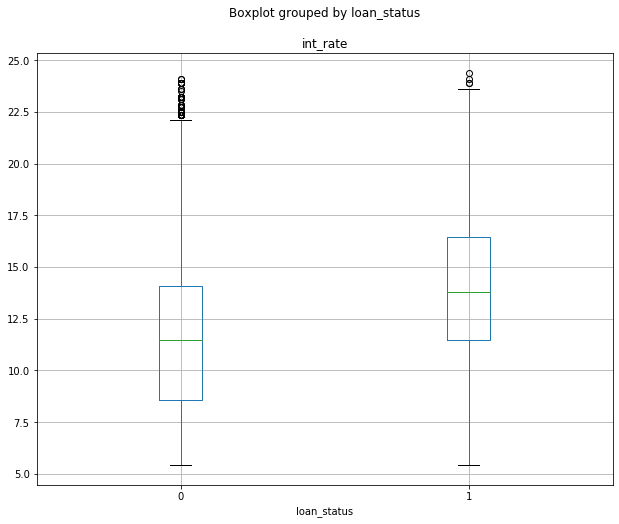

In [123]:
#Box Plot Representation of Interest Rate vs Loan_Status

loan.boxplot(column='int_rate', by='loan_status', figsize=(10,8))
plt.show()

**Analysis of Average Loan Amount, Interest Rate,Loan Amount with Time**

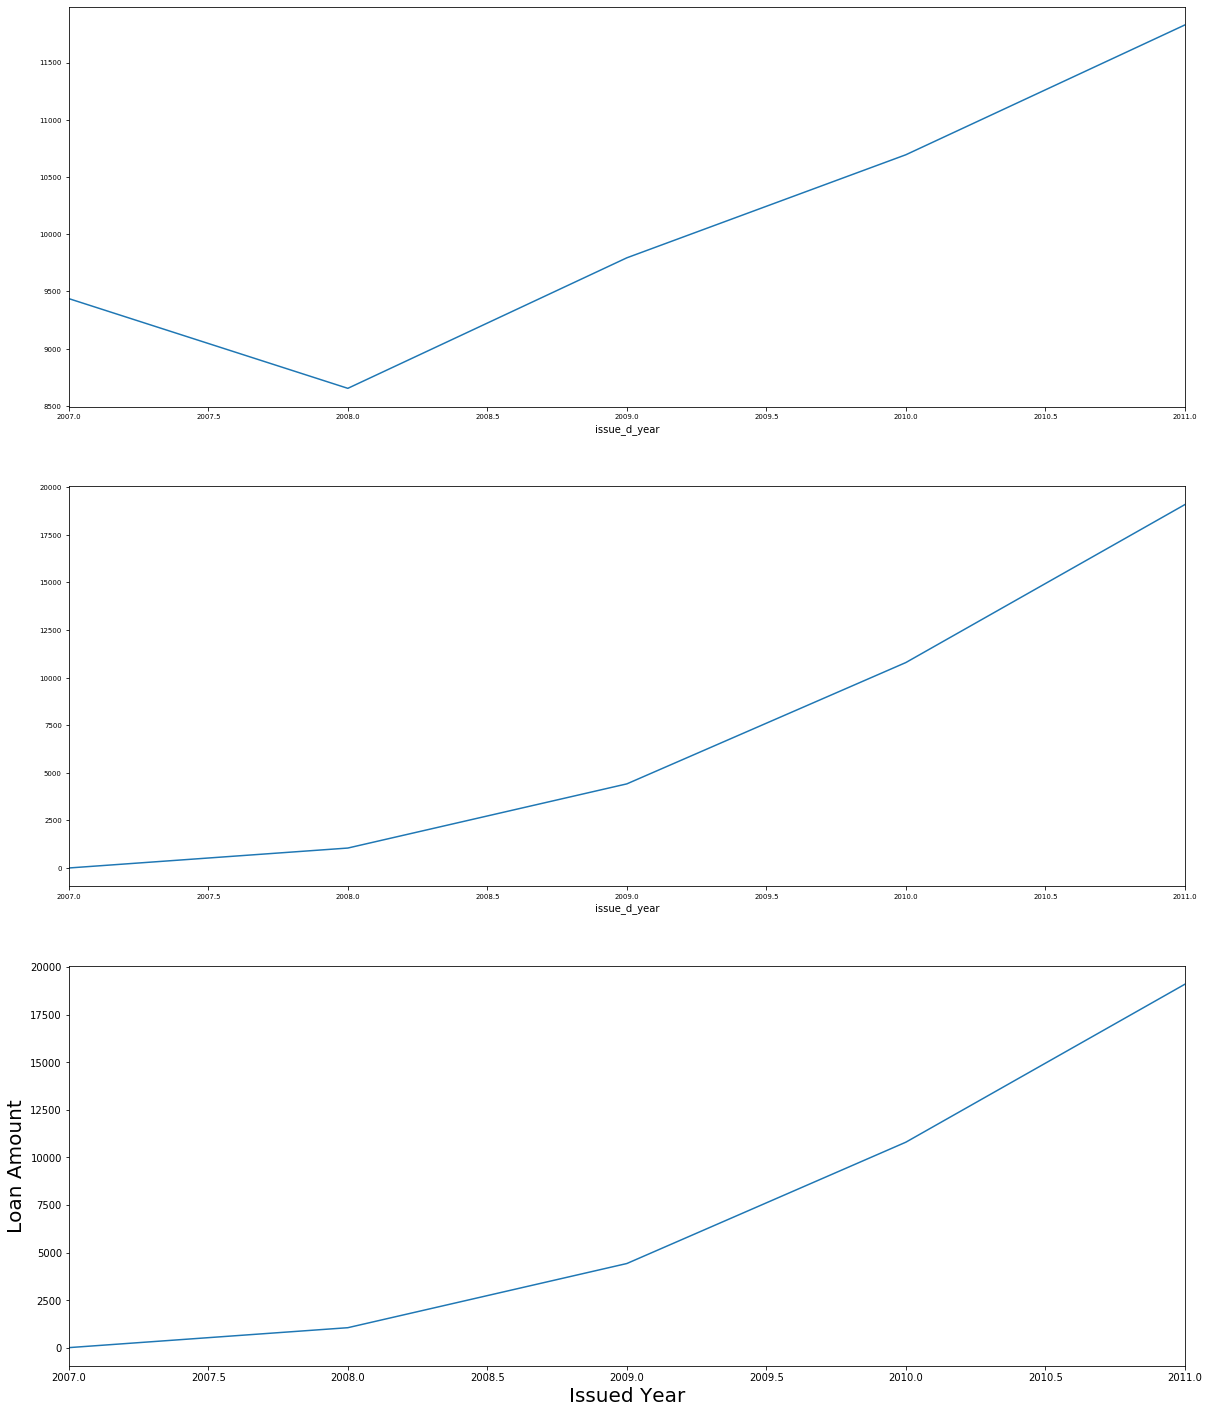

In [124]:
plt.figure(figsize=(20,25))
plt.subplot(311)
loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)

plt.subplot(312)
loan.groupby('issue_d_year').int_rate.count().plot(kind='line', fontsize=7)

plt.subplot(313)
g=loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=10)
g.set_xlabel("Issued Year", fontsize=20)
g.set_ylabel("Loan Amount", fontsize=20)

plt.show()

Observation : 

    1- The average loan amount dropped sharply in 2008.

**Plotting Heatmap of Continous Variables**

(9.0, 0.0)

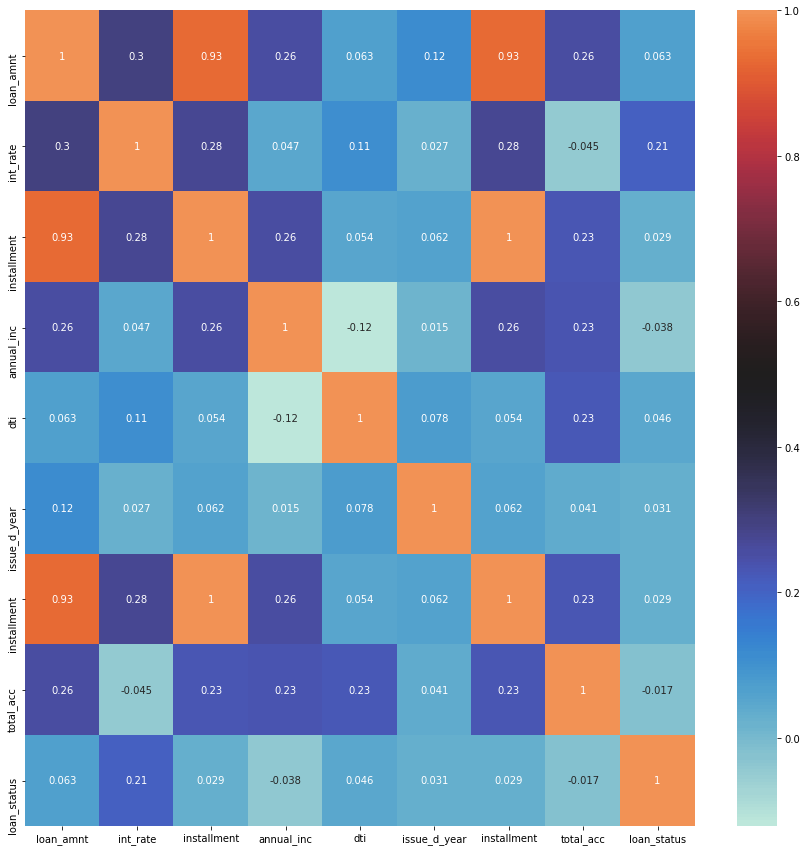

In [125]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment','annual_inc','dti','issue_d_year','installment',
       'total_acc','loan_status']
corr = loan[cont_var].corr()
g=sns.heatmap(corr, annot=True, center=0.5)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5,top - 0.5)

Observations: 

    1-loan_amnt is highly correlated to loan amount with r-factor of 0.93, as expected. 
    2-int_rate is correlated to loan amount with a positive coefficient of 0.3. This indicates when the loan amount increases, int_rate also increases.